# Исследование закономерностей успешных видеоигр

Игровая индустрия - это быстроразвивающийся рынок цифровых технологий в сфере развлечения. Благодаря появлению и, что важнее, доступности этих технологий, ежегодно доход от видеоигр достигает десятков млрд $.

C каждым годом появляется все более качественные и разнообразные игры. Поэтому увеличивается и аудитория, готовая приобрести продукт. К примеру продажи игры "GTA: V" составили более 130 млн. копий, обеспечив прибыль $5.2 млрд.

В рамках исследования попытаемся определить закономерности успешности таких игр. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании для заказчика.

**Цель исследования** - определить закономерности успешных видеоигр, чтобы в дальнейшем использовать их для прогноза будущих продаж.

**Ход исследования:** 

1. Предварительный обзор данных.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Портер пользователя каждого региона.
5. Проверка статистических гипотез.
6. Общий вывод

# Описание данных

* **Name** — название игры
* **Platform** — платформа
* **Year_of_Release** — год выпуска
* **Genre** — жанр игры
* **NA_sales** — продажи в Северной Америке (миллионы проданных копий)
* **EU_sales** — продажи в Европе (миллионы проданных копий)
* **JP_sales** — продажи в Японии (миллионы проданных копий)
* **Other_sales** — продажи в других странах (миллионы проданных копий)
* **Critic_Score** — оценка критиков (максимум 100)
* **User_Score** — оценка пользователей (максимум 10)
* **Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Общая информация данных 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('/yandex/practicum/datas/games.csv')

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Датасет состоит из 11 колонок и 16715 строк. Выше можно заметить, что большое количество пропусков в колонках с информацией рейтинга видеоигр. Скорее всего такие пропуски не получится восстановить и придется работать со срезом данных, не учитывая пропуски. Имеющихся данных достаточно.

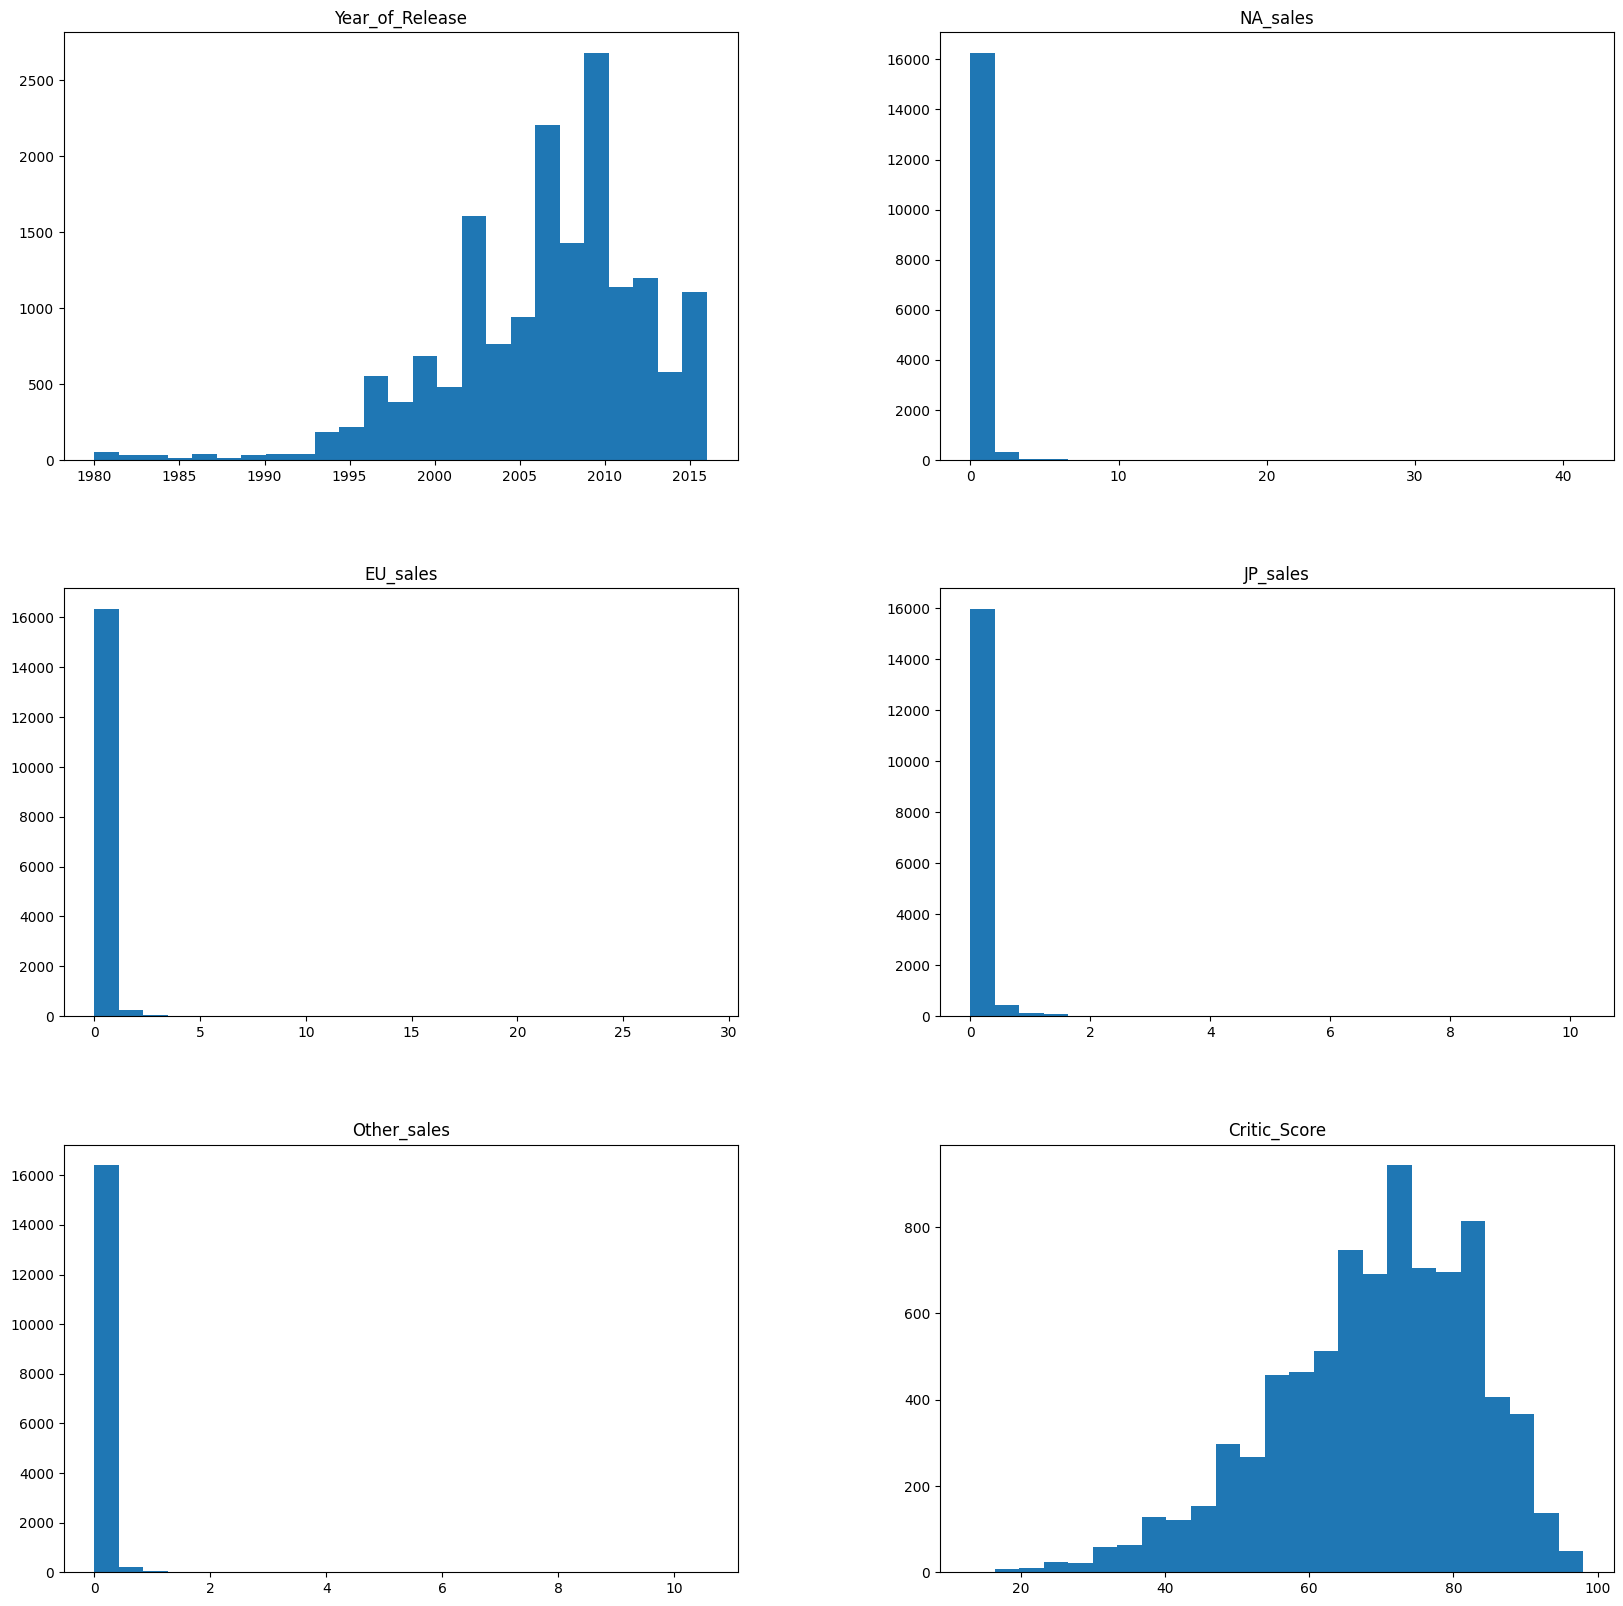

In [5]:
data.hist(bins=25, figsize=(20,20), grid=False);

* после 2000 года резко возросло количество релизов игр, что многовероятно связано с развитием технологий написания игр;
* критики довольно редко ставили плохие оценки, чаще встречаются оценки выше среднего.

Не удалось проанализировать распределение оценок от пользователей из-за неправильного типа данных. Посмотрим на гистограмму после преобразования типа данных. 

### Предобработка данных

#### Названия колонок

Выше можно заметить, что в названиях столбцов встречаются прописные буквы. Для удобства приведем их к нижнему регистру.

In [6]:
# в заголовках столбцов нет числовых значений, можно воспользоваться следующим методом
data.columns = data.columns.str.lower()

In [7]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### Типы данных

Характеристики, где появлялись пропуски, заполненные значением NaN, автоматически заменялись на тип переменных `float`, если это количественные переменные.

Посмотрим на значения в таблице и определим дальнейшие шаги.

In [8]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


* `year_of_release` и `critic_score`  - имеют тип данных float64 из-за наличие пропусков, поэтому сначала обработаем пропуски, а затем изменим тип данных;
* `user_score` приведем к рациональным, так как оценки ставились по 10-ой шкале;
* оставшиеся колонки трогать не будем.

In [9]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [10]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце с оценкой пользователей встречается строковое значение 'tbd', которое означает, что оценку необходимо уточнить. 

Заменим такие значения на NaN и после преобразуем тип данных.

In [11]:
data['user_score'] = data['user_score'].replace('tbd', np.nan) #заменяем не числовую строку в тип NaN

In [12]:
data['user_score'] = data['user_score'].astype('float64') # преобразуем тип данных

Проверка выполненных преобразований.

In [13]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [14]:
data.shape

(16715, 11)

#### Обработка пропущенных значений

Ранее заметили, что в некоторых столбцах есть пропуски. Проанализируем их и попробуем заполнить.

In [15]:
# создадим таблицу с информацией о пропущенных значений
# в дальнейшем используем для построения гистрограмм
data_na = data.isna().sum().sort_values(ascending=False)/data.shape[0] *100
data_na

user_score         54.591684
critic_score       51.319174
rating             40.478612
year_of_release     1.609333
name                0.011965
genre               0.011965
platform            0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
dtype: float64

<div class="alert alert-warning">
<b>Комментарий 👉</b>

В библиотеке Pandas более типичным способом получения информации о размерности датафрейма  является использование метода **shape**, а не функции **len()** или **info()**. Так (**псевдокод**): df.shape[0] – «покажет» количество строк в датафрейме, а df.shape[1] - количество столбцов. Ну а df.shape – выведет размерность датафрейма в виде кортежа с 2мя значениями (первое число – количество строк, второе – столбцов).</div>

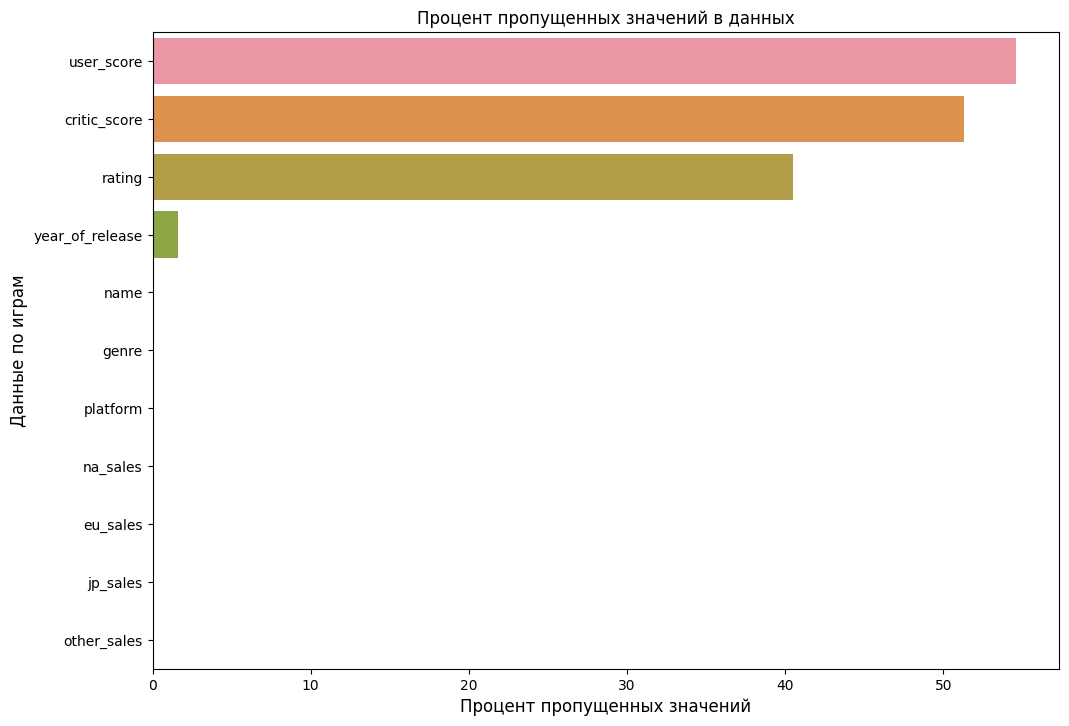

In [16]:
fig, axs = plt.subplots(figsize=(11.7, 8.27))
sns.barplot(y=data_na.index, x=data_na)

plt.ylabel('Данные по играм', fontsize=12);
plt.xlabel('Процент пропущенных значений', fontsize=12);
plt.title('Процент пропущенных значений в данных', fontsize=12);

Больше всего пропущенных значений в колонках `user_score`, `critic_score`, `rating`.

`user_score`, `critic_score` - в этих колонках невозможно восстановить пропущенные значения, оценки являются субъективным мнением пользователя или критика. В дополнении неясно откуда брались значения оценок.

Возрастную категорию `rating` в теории можно восстановить, проанализировав какой рейтинг обычно присваивается определенному жанру. Но существуют жанры, в которых такая оценка может варьироваться от безопасно для детей до непредназначено для детей младше 17 лет. Поэтому пропуски заполнять не стоит, чтобы не исказить данные. Достоверных данных и так достаточно для выявления закономерностей

`year_of_release`, `name`, `genre` - в этих столбцах очень мало пропусков. Год релиза можно восстановить информацией, полученной из интернета, но это всего лишь 1.5% от общих данных, поэтому оставим как есть. В колонках с наименованием и жанром игры одинаковое количество пропусков. Скорее всего пропущенны значения в одних и тех же строках. От них можно избавиться.

In [17]:
# датафрейм пропущенных значений в колонке 'name'
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропущенны значения с платформой GEN. Это игровая приставка Sega genesis, выпущенная в 1988 году. Такие данные не нужны для дальнейшех исследований.

Посмотрим сколько игры в данных на этой платформе.

In [18]:
data[data['platform'] == 'GEN']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
145,Sonic the Hedgehog 2,GEN,1992.0,Platform,4.47,1.20,0.16,0.19,NaN,NaN,NaN
257,Sonic the Hedgehog,GEN,1991.0,Platform,3.03,0.91,0.26,0.13,NaN,NaN,NaN
564,Mortal Kombat,GEN,1992.0,Fighting,1.95,0.63,0.00,0.09,NaN,NaN,NaN
588,Streets of Rage,GEN,1990.0,Action,1.86,0.55,0.11,0.08,NaN,NaN,NaN
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
832,NBA Jam,GEN,1992.0,Sports,1.75,0.25,0.00,0.05,NaN,NaN,NaN
960,Sonic & Knuckles,GEN,1994.0,Platform,1.24,0.43,0.03,0.12,NaN,NaN,NaN
996,Sonic the Hedgehog 3,GEN,1994.0,Platform,1.02,0.47,0.20,0.07,NaN,NaN,NaN
1099,Street Fighter II': Special Champion Edition,GEN,1992.0,Fighting,1.00,0.30,0.31,0.04,NaN,NaN,NaN
1365,Disney's The Lion King,GEN,1994.0,Platform,0.97,0.37,0.03,0.05,NaN,NaN,NaN


In [19]:
len(data[data['platform'] == 'GEN'].index) #количество игр платформы GEN

29

Для этой платформы уже давно не выпускаются игры. Также очень малое количество людей пользуются этой приставкой. Поэтому данные с этой платформой можно удалить. Их всего 29, что меньше 1% от общих данных.

In [20]:
data = data.drop(data[data['platform'] == 'GEN'].index)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16686 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16686 non-null  object 
 1   platform         16686 non-null  object 
 2   year_of_release  16417 non-null  float64
 3   genre            16686 non-null  object 
 4   na_sales         16686 non-null  float64
 5   eu_sales         16686 non-null  float64
 6   jp_sales         16686 non-null  float64
 7   other_sales      16686 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


#### Обработка дубликатов

In [22]:
data.drop_duplicates()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Явных дубликатов не обнаружено.

Проверим наличие неявных дубликатов по названию игры, платформе, году релиза и жанра.

In [23]:
data.drop_duplicates(subset=['name', 'platform', 'year_of_release', 'genre'], keep='first')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [24]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [25]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16', '3DO',
       'GG', 'PCFX'], dtype=object)

#### Суммарные продажи по регионам

Добавим столбец с суммарными продажами по всем регионам для каждой игры. В дальнейшем это поможет выявить закономерности успешных игр.

In [26]:
# создадим список с продажами по отдельным регионам
sales = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
# просуммируем их значения и запишем результат в отдельную колонку
data['sales_total'] = data[sales].sum(axis=1)

In [27]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


С помощью данных нового столбца в будущем будем считать долю продаж каждого региона, чтобы определить потенциальный доход продукта. Можно заметить, что в данных доминируют три региона: Северная Америка, Европа и Япония. Скорее всего будем ориентироваться на эти рынки, не считая продажи в других регионах.

### Исследовательский анализ данных

Для того чтобы определить закономерности успешных игр, необходимо определить что такое "успешность игры". Так как в дальнейшем такие закономерности будут использоваться для планирования рекламной кампании, то основным критерием будут продажи. 

Иногда бывает так, что рекламная кампания игры позволяет резко увеличить ее предзаказ. В дальнейшем игра не оправдывает ожиданий и получает низкие оценки как от критиков, так и от пользователей, что резко уменьшает количество продаж. Поэтому оценка критиков и  пользователей также влияет на успешность игры.

Зачастую успешные игры выпускаются в одном и том же жанре, но в разные годы популярными могут являться совсем другие жанры. Поэтому необходимо отделить данные и учитывать только актуальные.

Влияет так же и платформа, для которой выпускается игра. В данных, как уже заметили, есть устаревшие платформы, а некоторые имеют небольшое количество пользователей.  

В итоге в рамках данной работы успешной будет считать такую игру, **жанр** которой принес наибольшую прибыль, с оценками критиков и пользователей выше среднего, при этом недавно выпущенную.

Выполним анализ следующих данных:

1. Количество игр, выпущенных по годам.
2. Динамика продаж игр по платформам.
3. Определение актуальных данных (далее анализ будет выполняться по ним) и потенциально прибыльных платформ.
4. Определение зависимости глобальных продаж и платформ.
5. Определение корреляции между отзывами и продажами видеоигры.
6. Анализ жанров

####  Количество игр по годам

Сгруппируем количество выпущенных игр по годам и построим график. В данных встречаются игры, которые выпускались для разных платформ. Чтобы не исказить результат создадим новый датасет на основе данного, исключая "дубли" игр.

In [28]:
# такие дубликаты будем искать по совпадению имени и года релиза
count_data = data.drop_duplicates(subset=['name', 'year_of_release'], keep='first')

In [29]:
count_data.shape

(12403, 12)

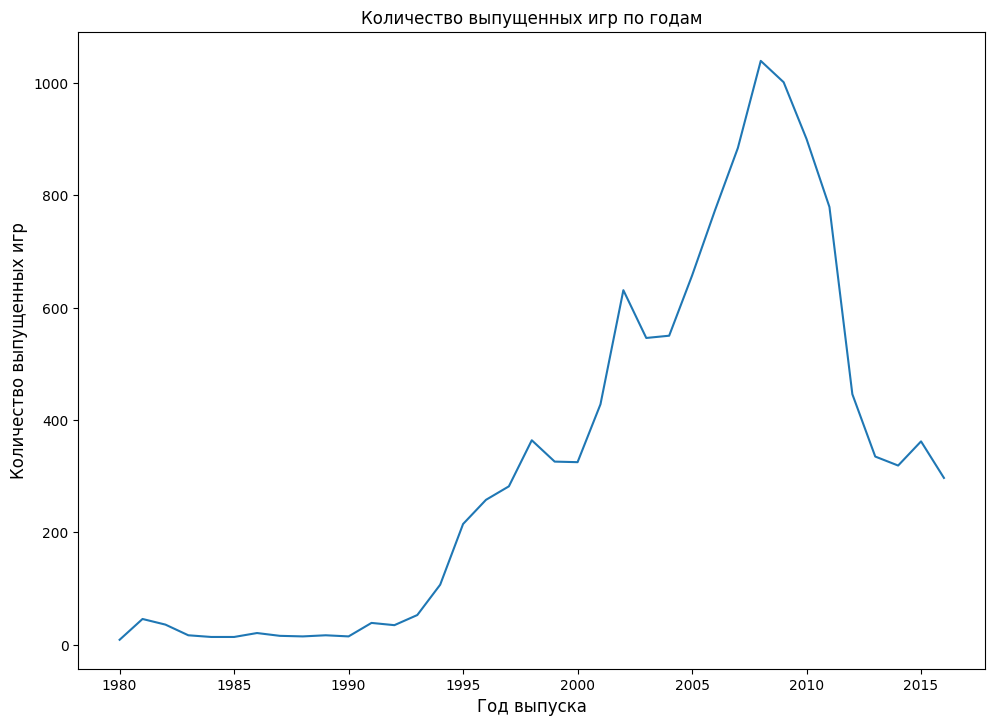

In [30]:
# группировка данных
games_per_year = count_data.groupby('year_of_release')['name'].count()

# построение графика
fig, ax = plt.subplots(figsize=(11.7, 8.27))
sns.lineplot(data=games_per_year);
plt.ylabel('Количество выпущенных игр', fontsize=12);
plt.xlabel('Год выпуска', fontsize=12);
plt.title('Количество выпущенных игр по годам', fontsize=12);

По графику видно, что до 1992 года количество выпущенных игр оставалось неизменным. Затем следует неболькой скачой и плавный рост до 2000 года. После 2000 года наблюдается резкий скачок, который достигает пика в 1400 выпущенных игр в 2008-2009 году. А после резкий спад.

Рост объясняется появлением и доступностью новых технологий. А спад экономическим кризисом 2008 года.

Индустрия видеоигр и платформ меняется ежегодно. Что в один год является горячей новинкой, через полгода-год является устаревшим продуктом. Поэтому учитывать данные по всем годам не является целесообразным решением, а даже может исказить получаемые выводы.

#### Динамика продаж по платформам

Аналогично сгруппируем суммарные продажи по платформам.

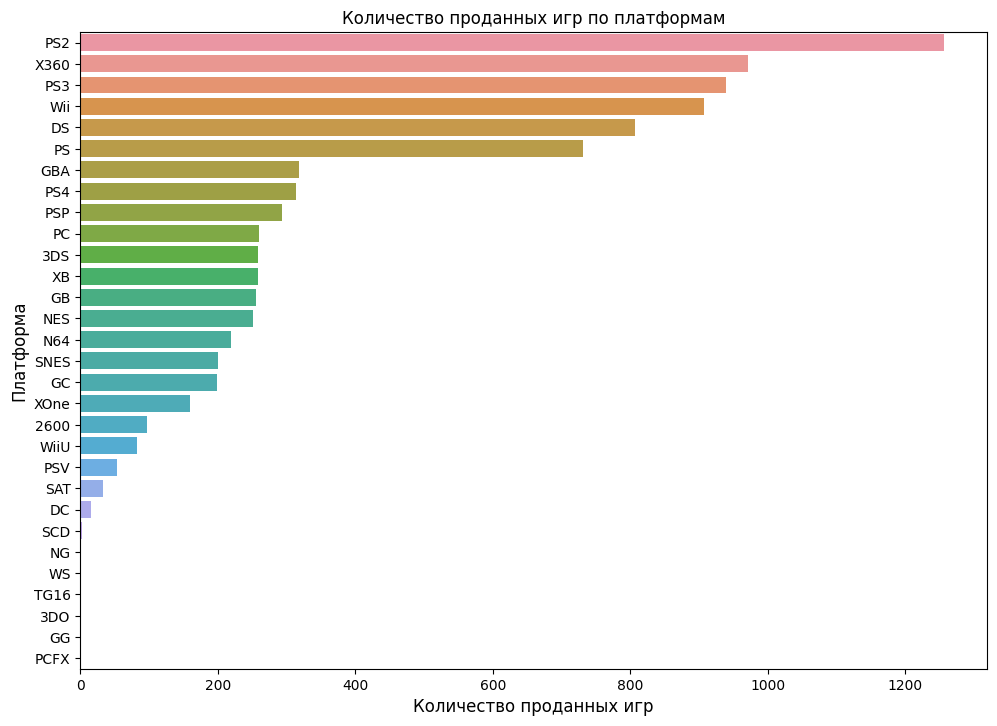

In [31]:
# группировка данных
sales_per_pl = data.groupby('platform')['sales_total'].sum().sort_values(ascending=False)

# построение графика
fig, ax = plt.subplots(figsize=(11.7, 8.27))
sns.barplot(y=sales_per_pl.index, x=sales_per_pl);
plt.ylabel('Платформа', fontsize=12);
plt.xlabel('Количество проданных игр', fontsize=12);
plt.title('Количество проданных игр по платформам', fontsize=12);

PS2 лидирует по продажам, далее идут платформы X360, PS3, Wii, DS и PS. 

PS2 - это самая продавая игровая приставка в мире. По многочисленным мнениям обогнать ее феноменальную популярность вряд ли получится. Поддержка этой приставки приостановлена в 2013 году, а PS еще раньше.

Посмотрим как менялись продажи по годам. Это поможет выявить закономерности пика продаж для каждой платформы.

In [32]:
# создадим список с шестью самыми популярными платформами
pop_platforms_list = data.pivot_table(index='platform', values='sales_total', aggfunc='sum')\
    .sort_values('sales_total', ascending=False)\
    .index[:6]\
    .tolist()
print('Список топ-6 популярных платформ', pop_platforms_list)

pop_pf_data = data.query('platform in @pop_platforms_list')
pop_pf_data['platform'].unique()

Список топ-6 популярных платформ ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']


array(['Wii', 'DS', 'X360', 'PS3', 'PS2', 'PS'], dtype=object)

In [33]:
pop_pf_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16700,Mezase!! Tsuri Master DS,DS,2009.0,Sports,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.00,0.00,NaN,NaN,E,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [34]:
pf_per_year = pop_pf_data.pivot_table(index='year_of_release', values='sales_total', columns='platform', aggfunc='sum')
pf_per_year = pf_per_year.replace(0.02, np.nan) 

In [35]:
pf_per_year

platform,DS,PS,PS2,PS3,Wii,X360
year_of_release,,,,,,
1985.0,NaN,NaN,NaN,NaN,NaN,NaN
1994.0,NaN,6.03,NaN,NaN,NaN,NaN
1995.0,NaN,35.96,NaN,NaN,NaN,NaN
1996.0,NaN,94.70,NaN,NaN,NaN,NaN
1997.0,NaN,136.17,NaN,NaN,NaN,NaN
1998.0,NaN,169.49,NaN,NaN,NaN,NaN
1999.0,NaN,144.53,NaN,NaN,NaN,NaN
2000.0,NaN,96.37,39.17,NaN,NaN,NaN
2001.0,NaN,35.59,166.43,NaN,NaN,NaN


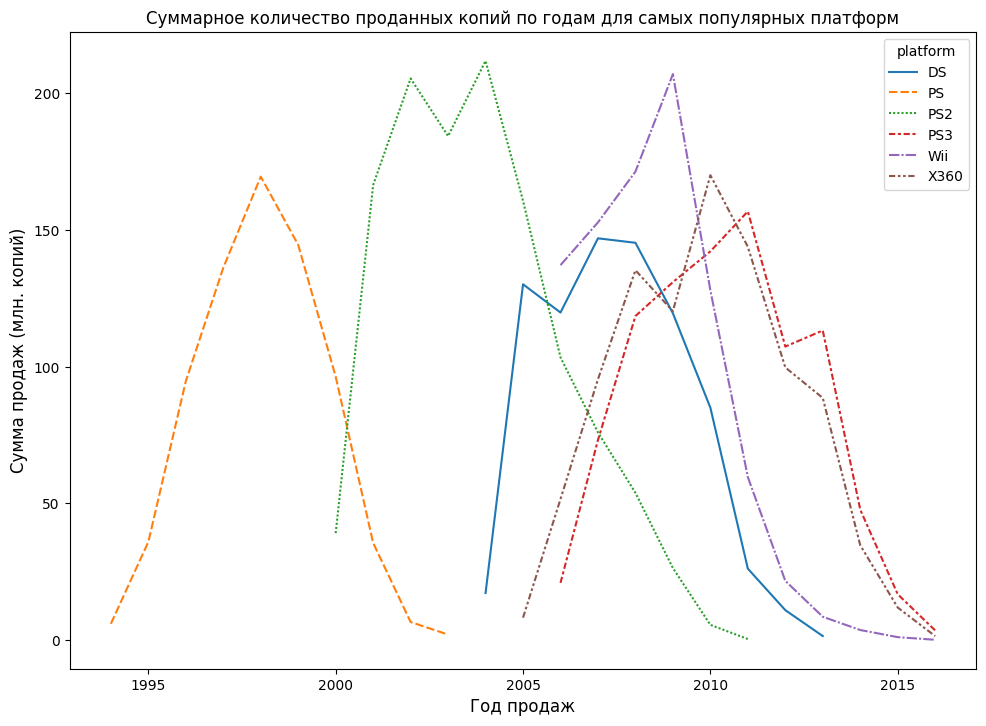

In [36]:
fig, ax = plt.subplots(figsize=(11.7, 8.27))
sns.lineplot(data=pf_per_year);
plt.ylabel('Сумма продаж (млн. копий)', fontsize=12);
plt.xlabel('Год продаж', fontsize=12);
plt.title('Суммарное количество проданных копий по годам для самых популярных платформ', fontsize=12);

Как можно заметить из сводной таблицы, пик популярности каждой платформы наступает спустя 4-5 лет после ее выпуска. Спад продаж, скорее всего, связан с появлением новой продукции от конкурентов. Видя, что продажи начинают падать, кампании анонсируют новую приставку. К примеру, Playstation 2 была выпущена в 2000 году, а релиз Playstation 3 произошел в 2006. При этом спустя 8-12 лет после выпуска поддержка платформы прекращается.

#### Определение актуального периода и платформ

Чтобы выяснить какой продукт принесет больше всего прибыли, необходимо проанализировать данные по актуальному периоду. Учитывая тенденцию роста и спада продаж игр по платформам, можно сделать вывод, что на 2017 год придет пик спроса игр на платформах, выпущенных 2012-2013 году. Поэтому актуальным периодом будем считать те игры, которые были выпущены с 2014 по 2016 год.

Для начала построим графики распределения продаж для каждой платформы из основного датасета и выделим актуальные платформы.

In [37]:
#актуальность платформ определим с 2010 по 2016 год (спустя 5 лет наступает пик, а данные за 2016 год неполные)
rel_data = data.query('year_of_release > 2009')
rel_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
14,Kinect Adventures!,X360,2010.0,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
27,Pokemon Black/Pokemon White,DS,2010.0,Role-Playing,5.51,3.17,5.65,0.80,NaN,NaN,NaN,15.13
29,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73


Изменим тип данных для столбца с информацией года релиза на целочисленный тип. В актуальных данных нет игр с пропуском значений этого параметра, поэтому проблем не возникнет.

In [38]:
rel_data['year_of_release'] = rel_data['year_of_release'].astype('int32')

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_10488\1169775891.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rel_data['year_of_release'] = rel_data['year_of_release'].astype('int32')


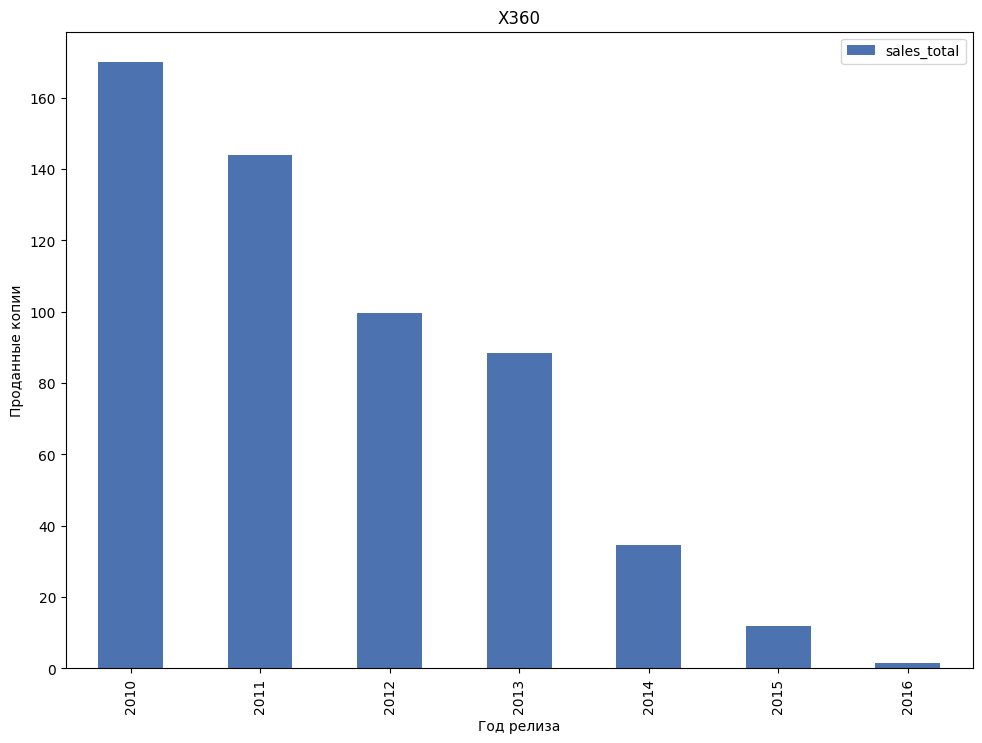

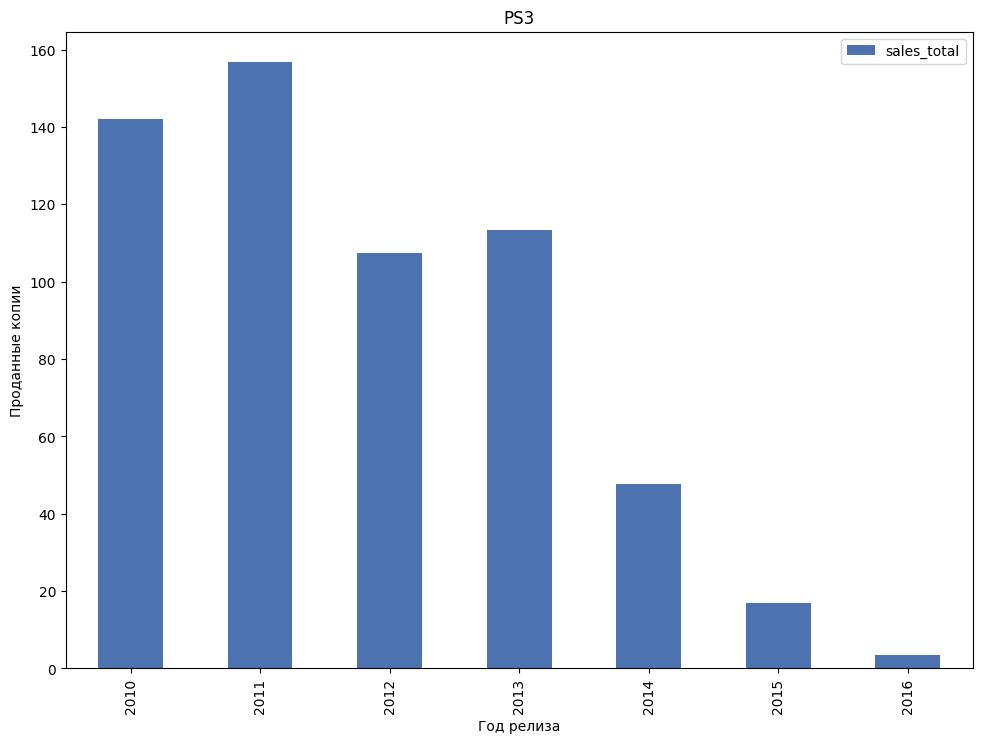

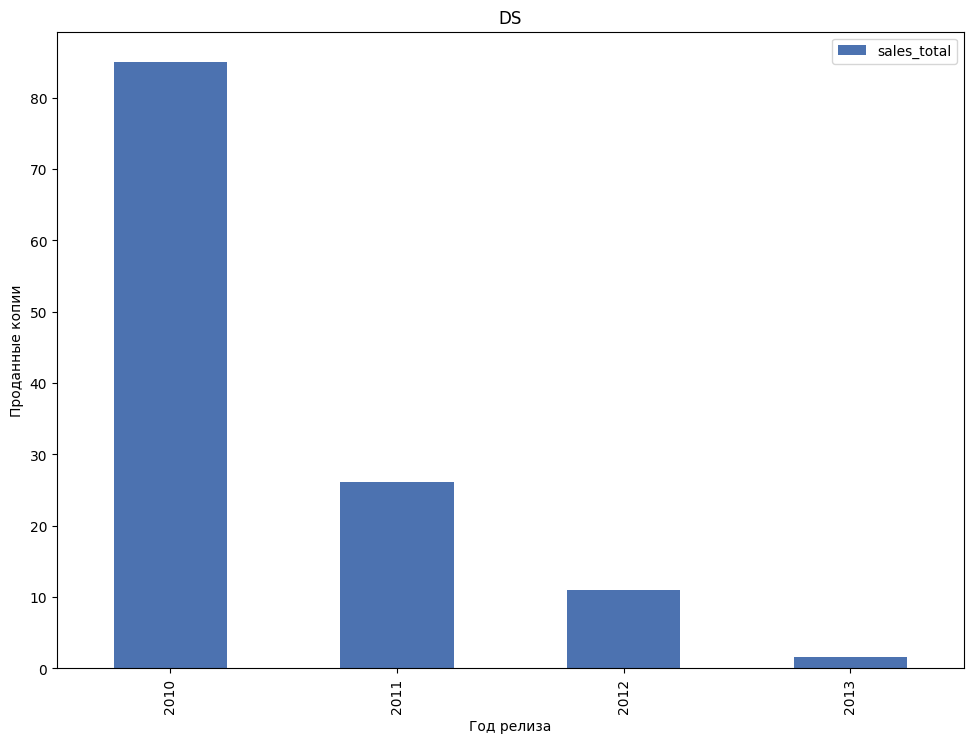

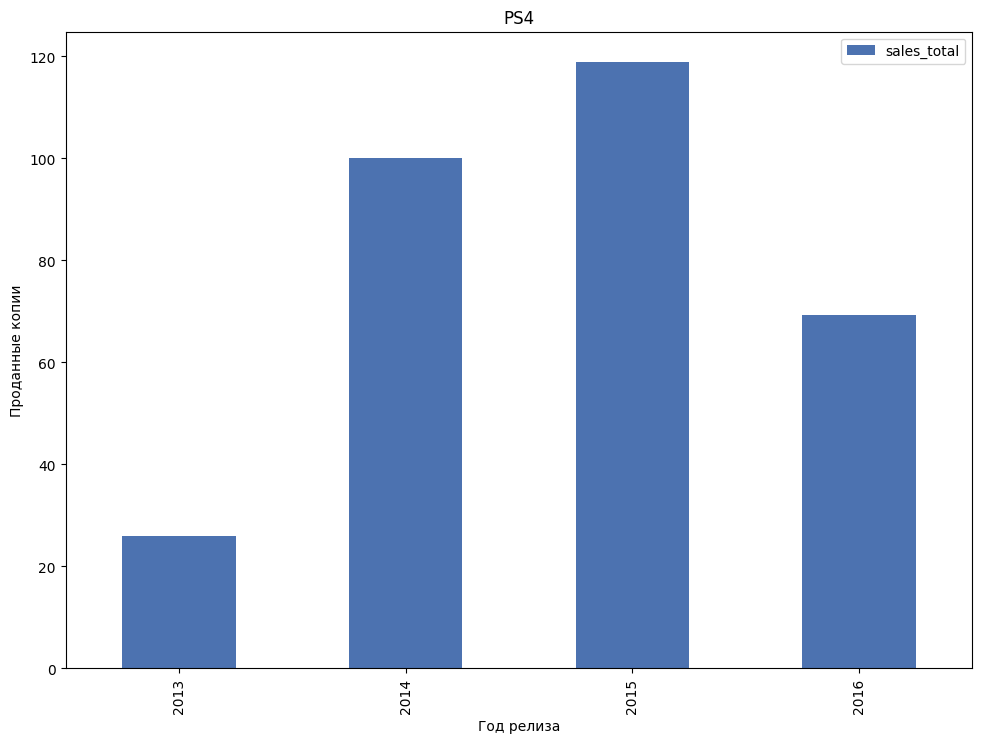

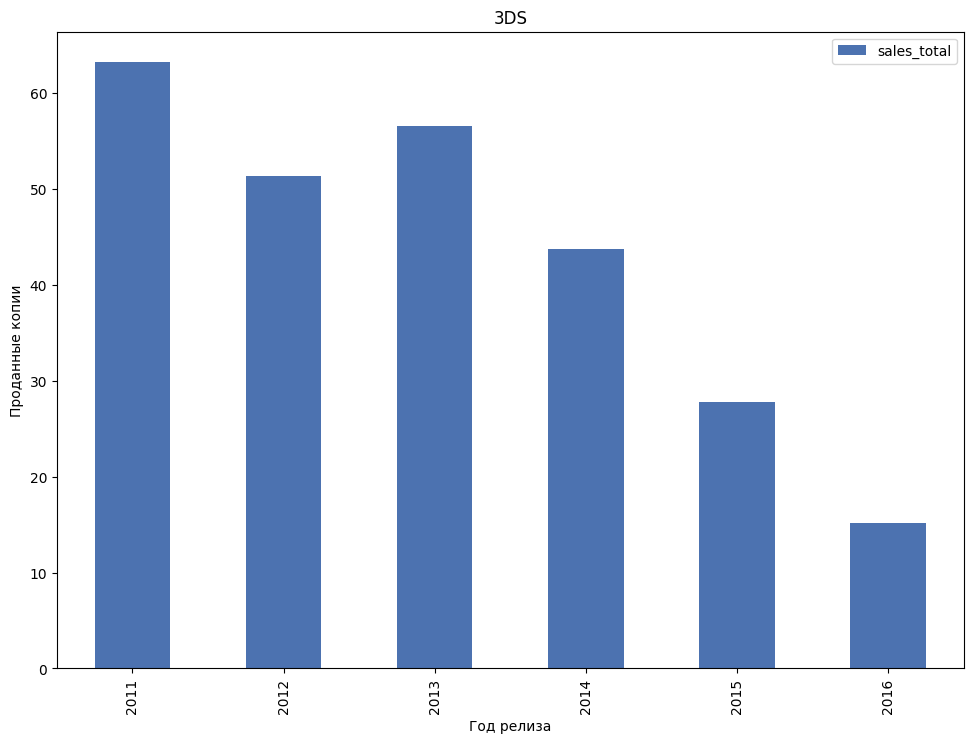

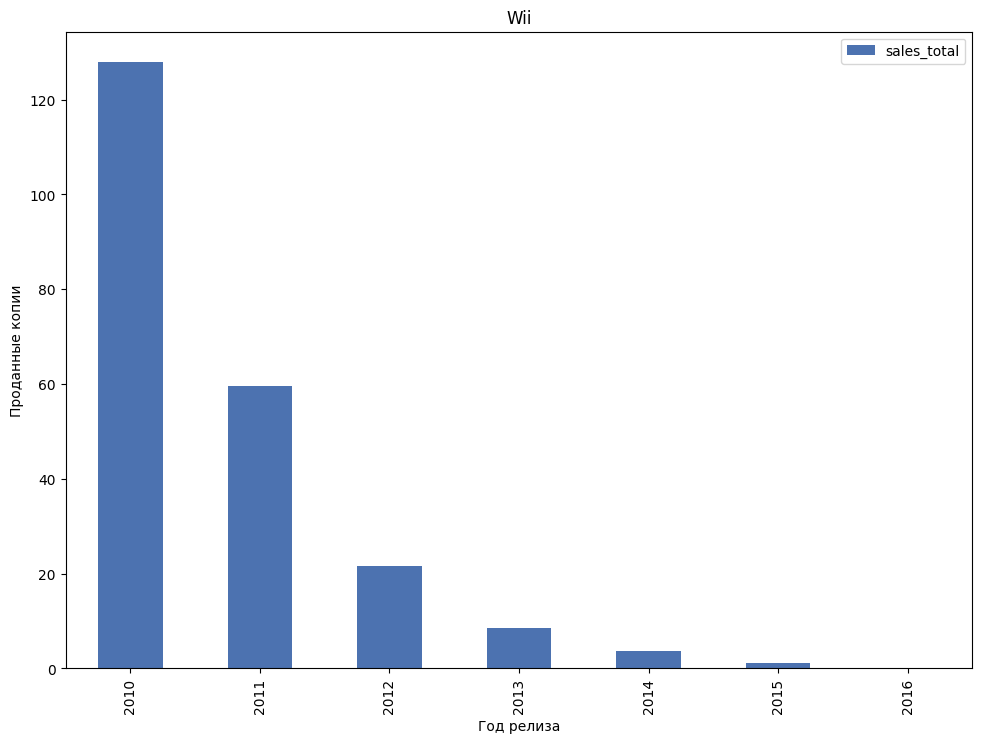

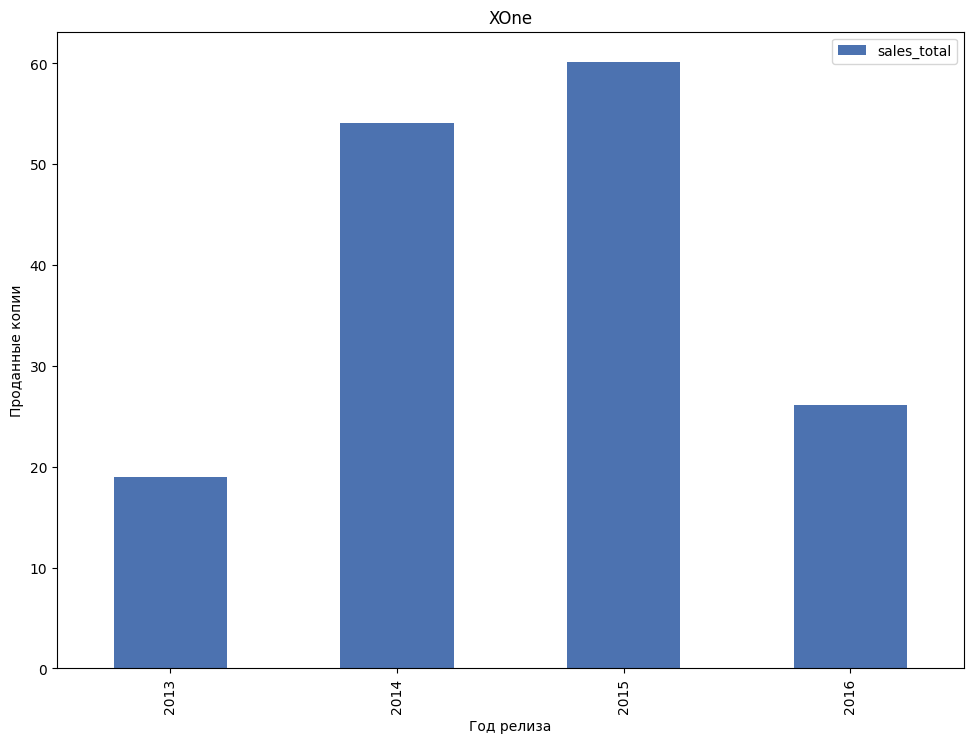

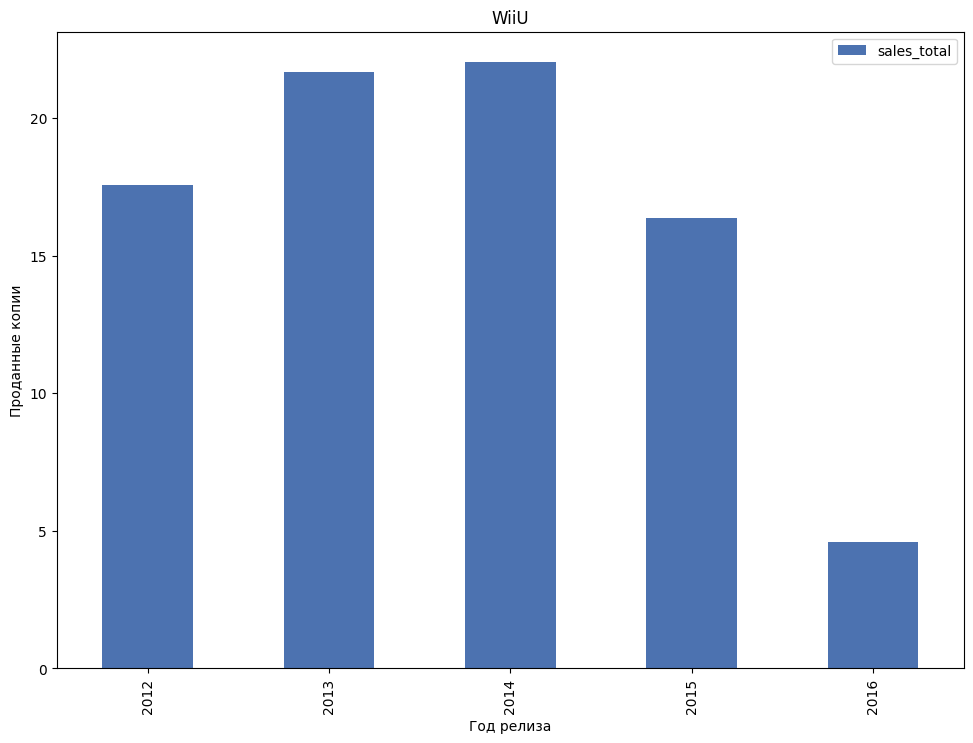

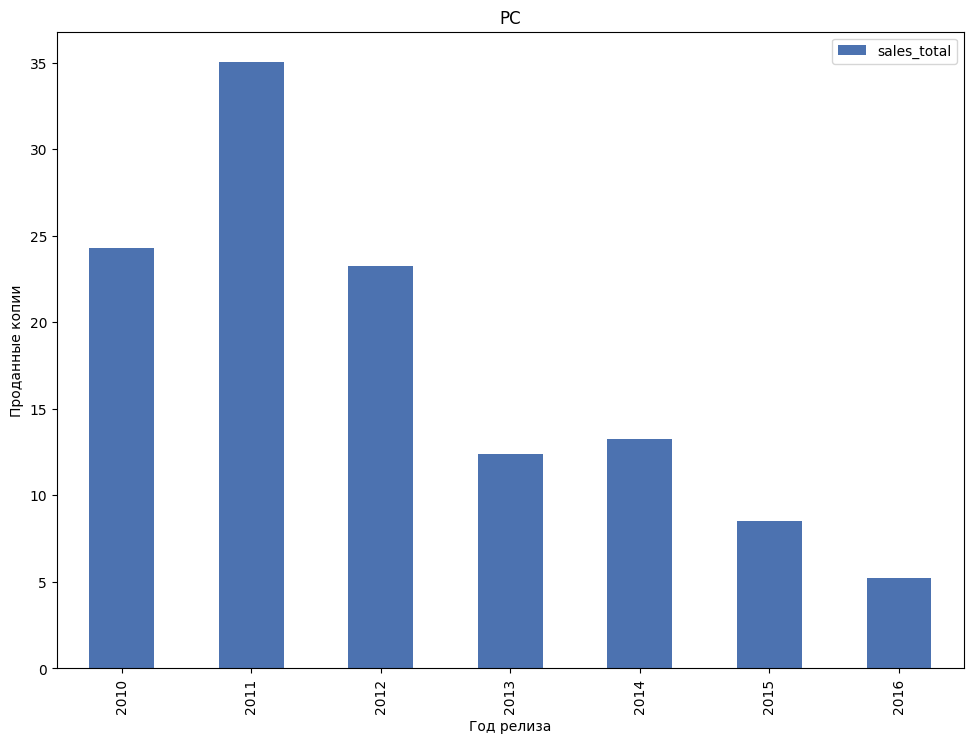

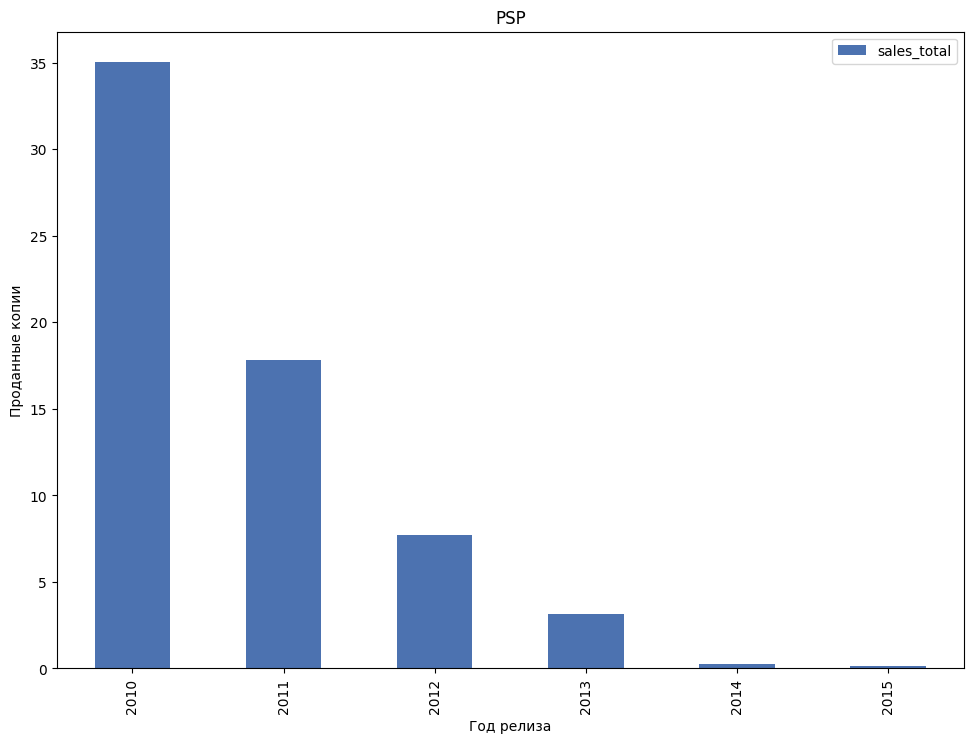

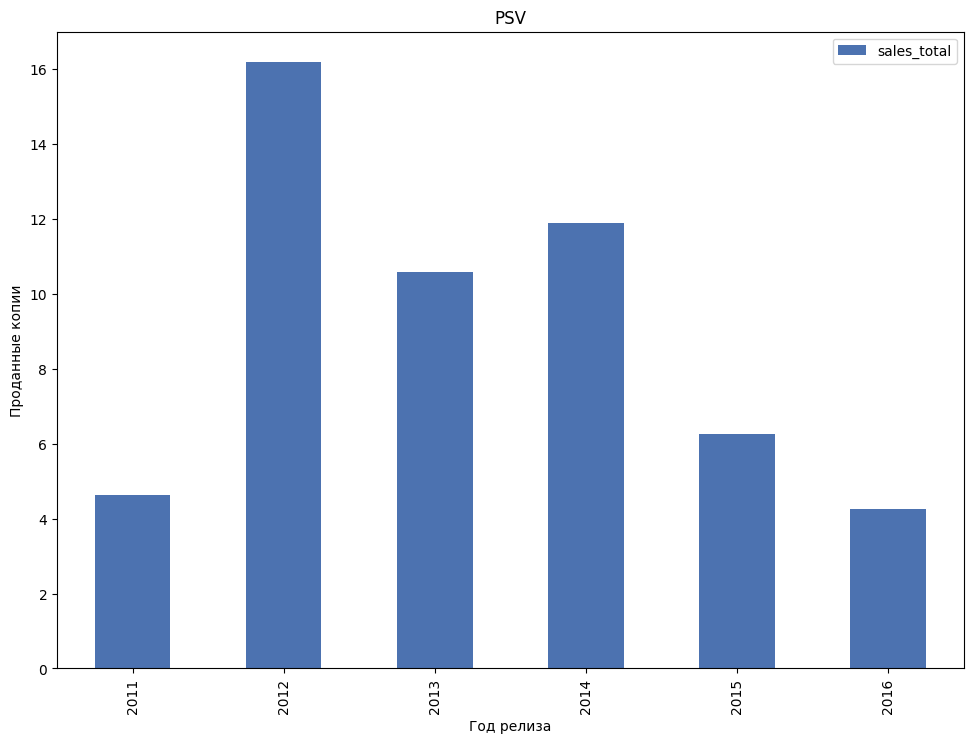

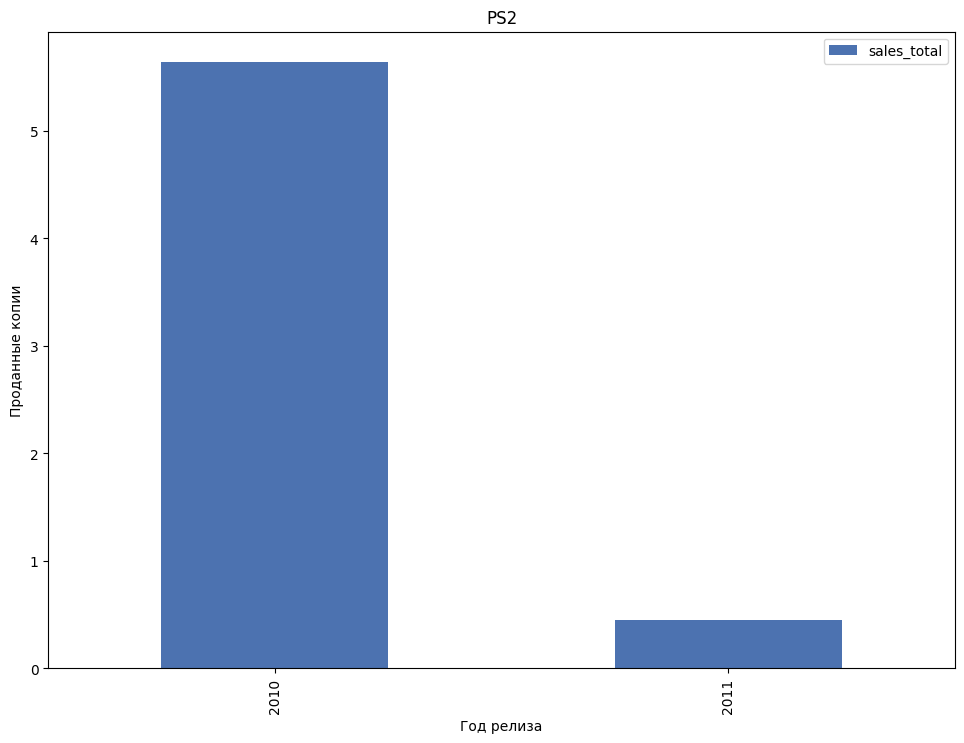

In [39]:
plt.style.use('seaborn-deep')
# построим диаграммы для каждой платформы с количеством проданных копий по годам
# для этого написан цикл с перебором уникальных значений в колонке с платформами
for platform in rel_data['platform'].unique():
    # далее для каждой уникальной платформы создается сводная таблица с годом выпуска и суммой продаж по годам
    # для каждой сводной таблицы строится диаграмма из ее данных
    (
    rel_data[rel_data['platform'] == platform]
        .pivot_table(index='year_of_release', values='sales_total', aggfunc='sum')
        .plot(kind='bar', figsize=(11.7, 8.27))
    )
    plt.title(platform)
    plt.xlabel('Год релиза')
    plt.ylabel('Проданные копии')

Прежде всего нас интересуют именно игровые приставки, так как на них приходится больше половины доли продаж в индустрии. Поэтому портативные приставки (PSP, PSV, 3DS) и персональные компьютеры не подходят. Хоть приставка WiiU 2012 года релиза, но продажи игр очень малы. В итоге из платформ остаются игровые приставки от Sony Computer Entertainment (PS) и Microsoft(Xbox).

Из этих платформ нас интересуют только две приставки - PS4 и XOne. Их релиз состоялся в конце ноября 2013 года примерно в один и тот же день. Учитывая выявленные закономерности, пик продаж видеигр для этих консолей как раз приходится на 2017-2018 годы. 


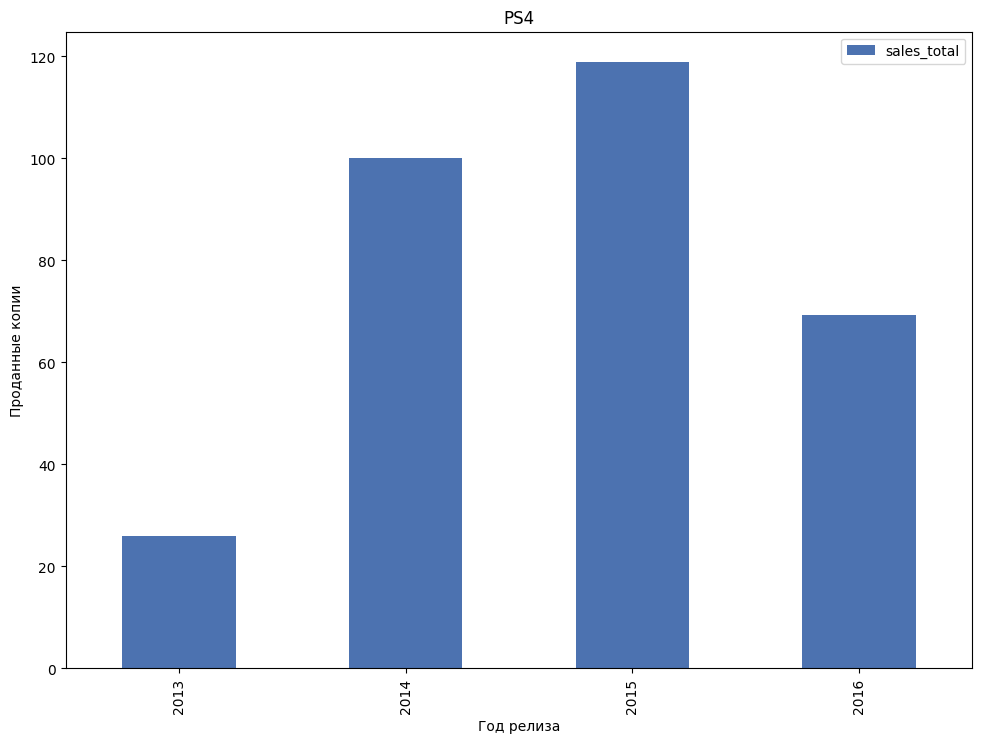

In [40]:
(
rel_data[rel_data['platform'] == 'PS4']
        .pivot_table(index='year_of_release', values='sales_total', aggfunc='sum')
        .plot(kind='bar', figsize=(11.7, 8.27))
)
plt.title('PS4')
plt.xlabel('Год релиза')
plt.ylabel('Проданные копии');

Исторически сложилось так, что приставки PS всегда показывают хорошие результаты по продажам. Это можно заметить и на примере PS4. Приставка вышла в конце 2013 года. За один месяц было продано почти 30 млн. копии игр. За 2015 год почти 120 млн. проданных копий.


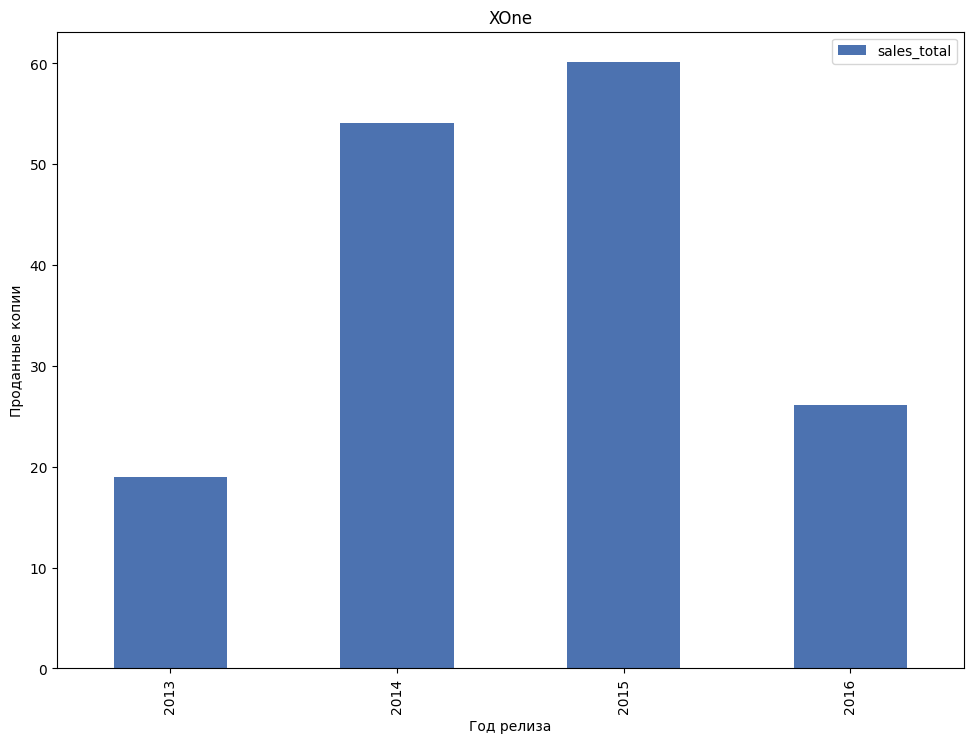

In [41]:
(
rel_data[rel_data['platform'] == 'XOne']
        .pivot_table(index='year_of_release', values='sales_total', aggfunc='sum')
        .plot(kind='bar', figsize=(11.7, 8.27))
)
plt.title('XOne')
plt.xlabel('Год релиза')
plt.ylabel('Проданные копии');

Хоть у консоли XOne в два раза меньше продаж за 2014-2016 года чем у PS4, но динамика продаж примерно такая же и ожидается рост вплоть до 2018 года.

В итоге ограничимся данными в промежутке 2014-2016 годов для приставок PS4 и XOne. Хоть и данные 2016 года неполные, у приставки PS4 за 2016 год 60 млн. проданных копий. 

In [42]:
rel_data = rel_data.query('year_of_release > 2013 & platform == ["PS4","XOne"]')
rel_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16630,Sébastien Loeb Rally Evo,XOne,2016,Racing,0.00,0.01,0.00,0.00,63.0,8.2,E,0.01
16643,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,NaN,6.6,E,0.01
16645,ZombiU,XOne,2016,Action,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,6.7,NaN,0.01


#### Диаграмма размаха в разбивке по платформам

Построим диаграмму размаха для каждой платформы и опишем результат.

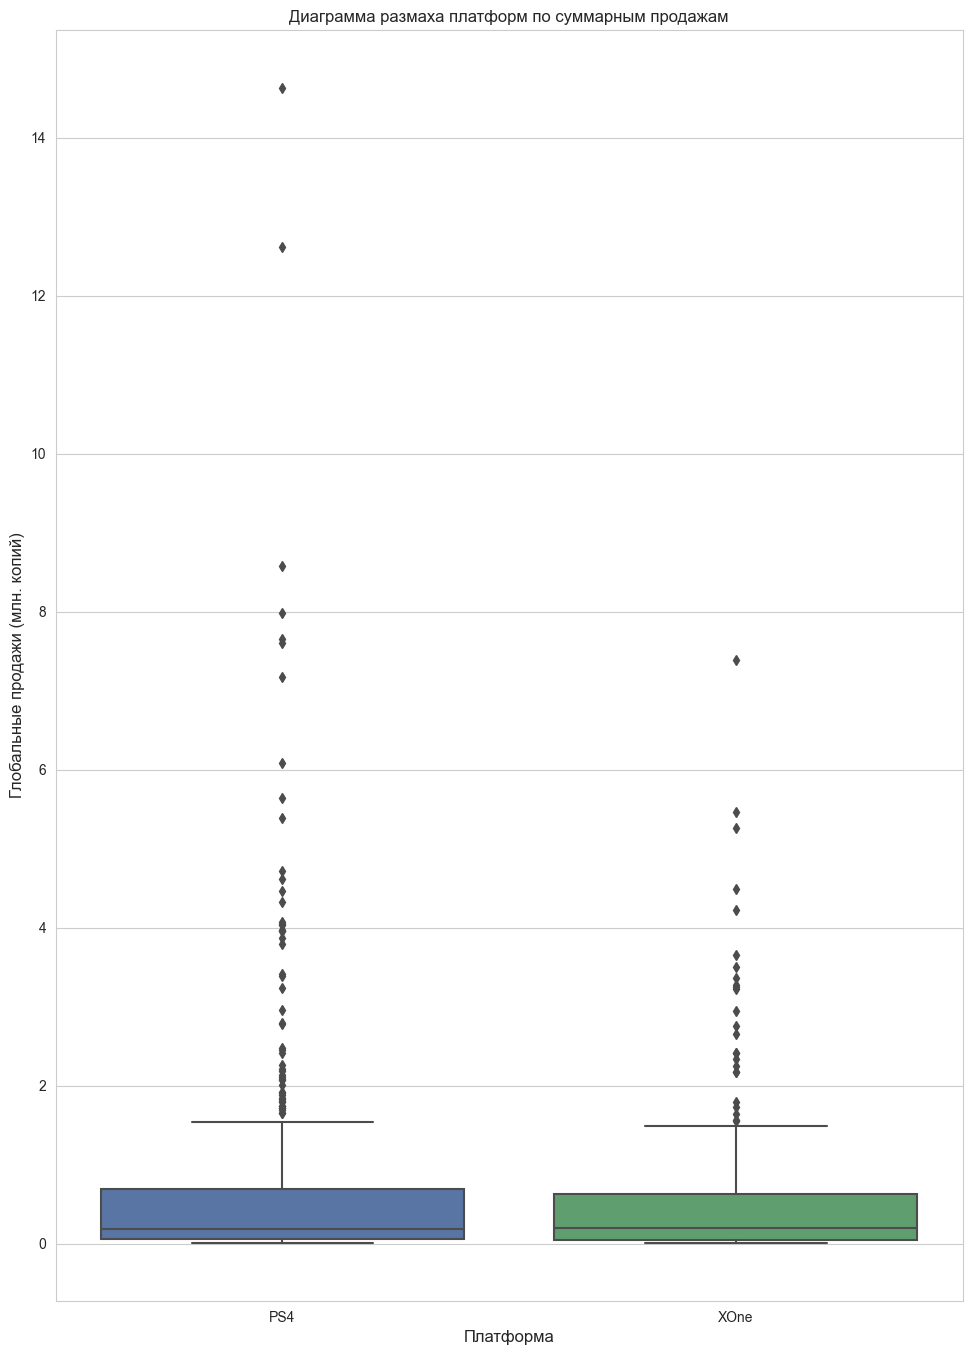

In [43]:
plt.figure(figsize=(11.7, 16.5))
sns.set_style('whitegrid')
ax = sns.boxplot(data=rel_data, x='platform', y='sales_total')
plt.title('Диаграмма размаха платформ по суммарным продажам', fontsize=12)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи (млн. копий)',fontsize=12);

На этом графике уверенно сравнивать квартили платформ не получается. Велика вероятность ошибки. Для более наглядных результатов сделаем дополнительный график, где будет отображена только нижняя часть диаграмм размахов. Для этого ограничим значение по оси Y самым большим из двух 1.5 межквартильных разамахов распределений.

Получим точные данные, описывающие распределение.

In [44]:
desc_stat = rel_data.groupby('platform')['sales_total'].describe().T

In [45]:
desc_stat

platform,PS4,XOne
count,376.000000,228.000000
mean,0.766356,0.615614
std,1.614969,1.046513
min,0.010000,0.010000
25%,0.057500,0.050000
50%,0.185000,0.205000
75%,0.690000,0.632500
max,14.630000,7.390000


Вычислим наибольшее значений межкв. размаха.

In [46]:
for i in desc_stat.columns.unique():
    print('Межквартильный размах', i, (desc_stat[i]['75%'] - desc_stat[i]['25%']).round(5), 'продаж')

Межквартильный размах PS4 0.6325 продаж
Межквартильный размах XOne 0.5825 продаж


In [47]:
# принимаем значение межкв. размаха PS4 как максимального
IQR = 0.6325

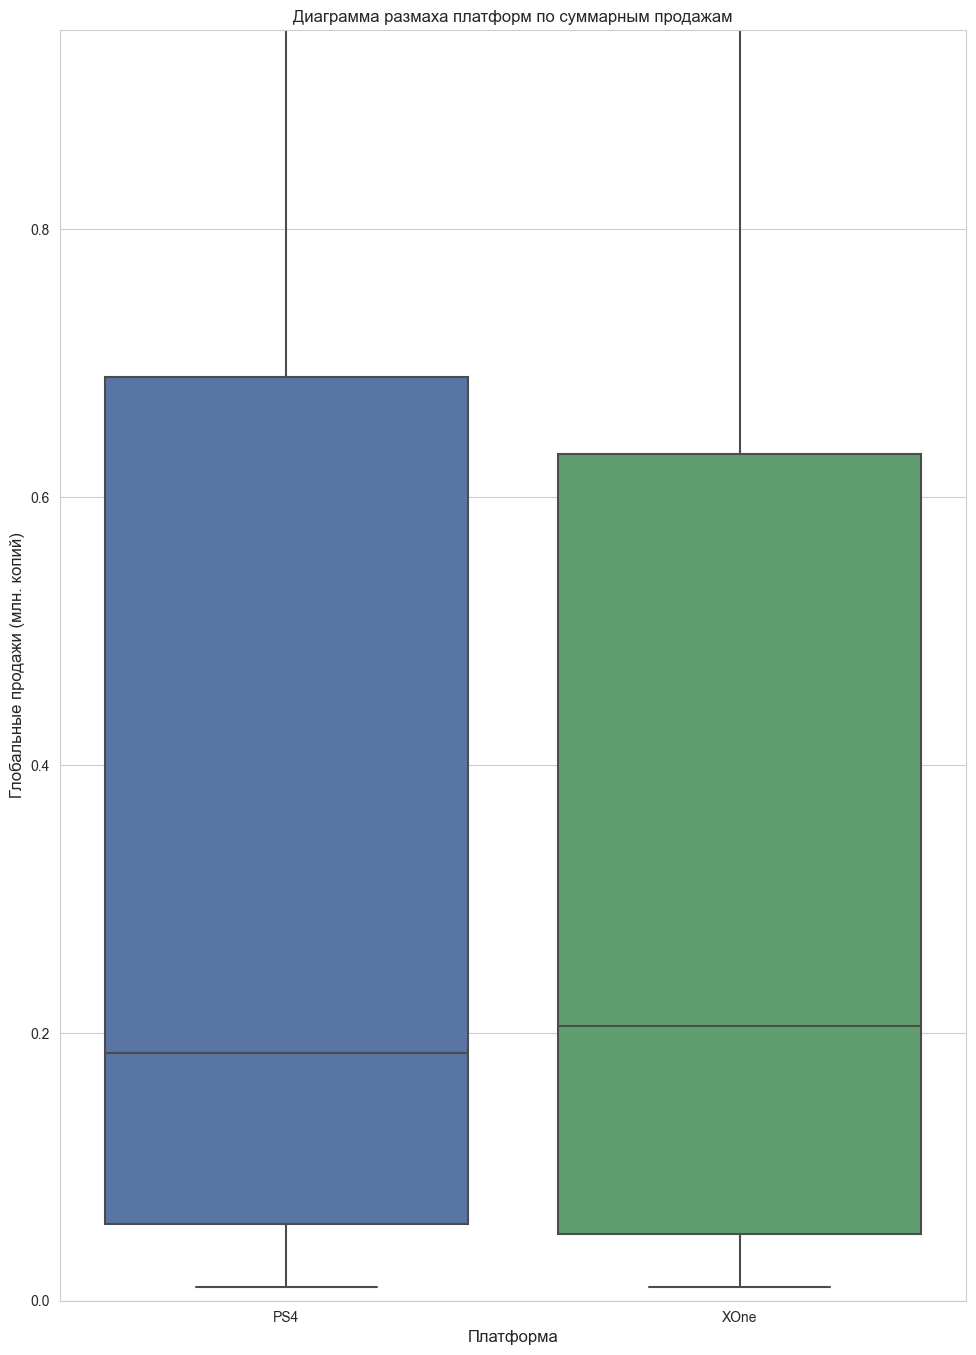

In [48]:
plt.figure(figsize=(11.7, 16.5))
sns.set_style('whitegrid')
ax = sns.boxplot(data=rel_data, x='platform', y='sales_total')
ax.set(ylim=(0, IQR * 1.5))
plt.title('Диаграмма размаха платформ по суммарным продажам', fontsize=12)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи (млн. копий)',fontsize=12);

Можно увидеть, что большая часть данных находится в диапозоне до 700 тыс. проданных копий для PS4 и чуть меньше для XOne, что выглядит правдоподобно. Для приставки PS4 было выпущено в 1.5 раза больше продуктов. При этом есть такие игры, которые превышают 12 и 14 млн. проданных копий. 

Так же приставка XOne как будто не существует для японского рынка, хоть и в целом продажи в Японии видеогр на порядок ниже чем в других странах. XOne наиболее популярна в Северной Америке, а в остальных странах доминирует PS4.

Не смотря на то что в каждый год продажи видеоигр для приставки PS4 в два раза больше чем для XOne, диаграммы размаха почти не отличаются. Медиана продаж у XOne чуть больше PS4.

#### Влияние отзывов критиков и пользователей на продажи

##### PS4

Для определения корреляции количества проданных копий игры и отзывов возьмем данные по одной платформе (PS4). По диаграмам размаха заметно, что у PS4 очень большое количество выбросов. Анализировать влияние отзыв, учитывая игры, достигающие рекордных продаж, не даст полезных результатов, а только исказит их. Такие игры появляются редко. Поэтому сперва необходимо ограничить число продаж, по которому будет проходить анализ, избавившись от аномальных значений.

Посмотрим сколько всего игр было выпущено для платформы PS4.

In [49]:
rel_data.query('platform == "PS4"').shape[0]

376

Теперь посмотрим сколько аномальных значений по боксплоту.

In [50]:
rel_data.query('platform == "PS4" & sales_total > @IQR * 1.5').shape[0]

71

Выходит, если отбрасывать аномальные значения по боксплоту, то мы не будем учитывать почти 20% данных по выборке, что достаточно много. Боксплот хорошо работает на однородной выборке, но в нашем случае она неоднородна. Поэтому стоит использовать гистограммы для определения границ хвостов.

In [51]:
rel_data_ps4 = rel_data.query('platform == "PS4"')

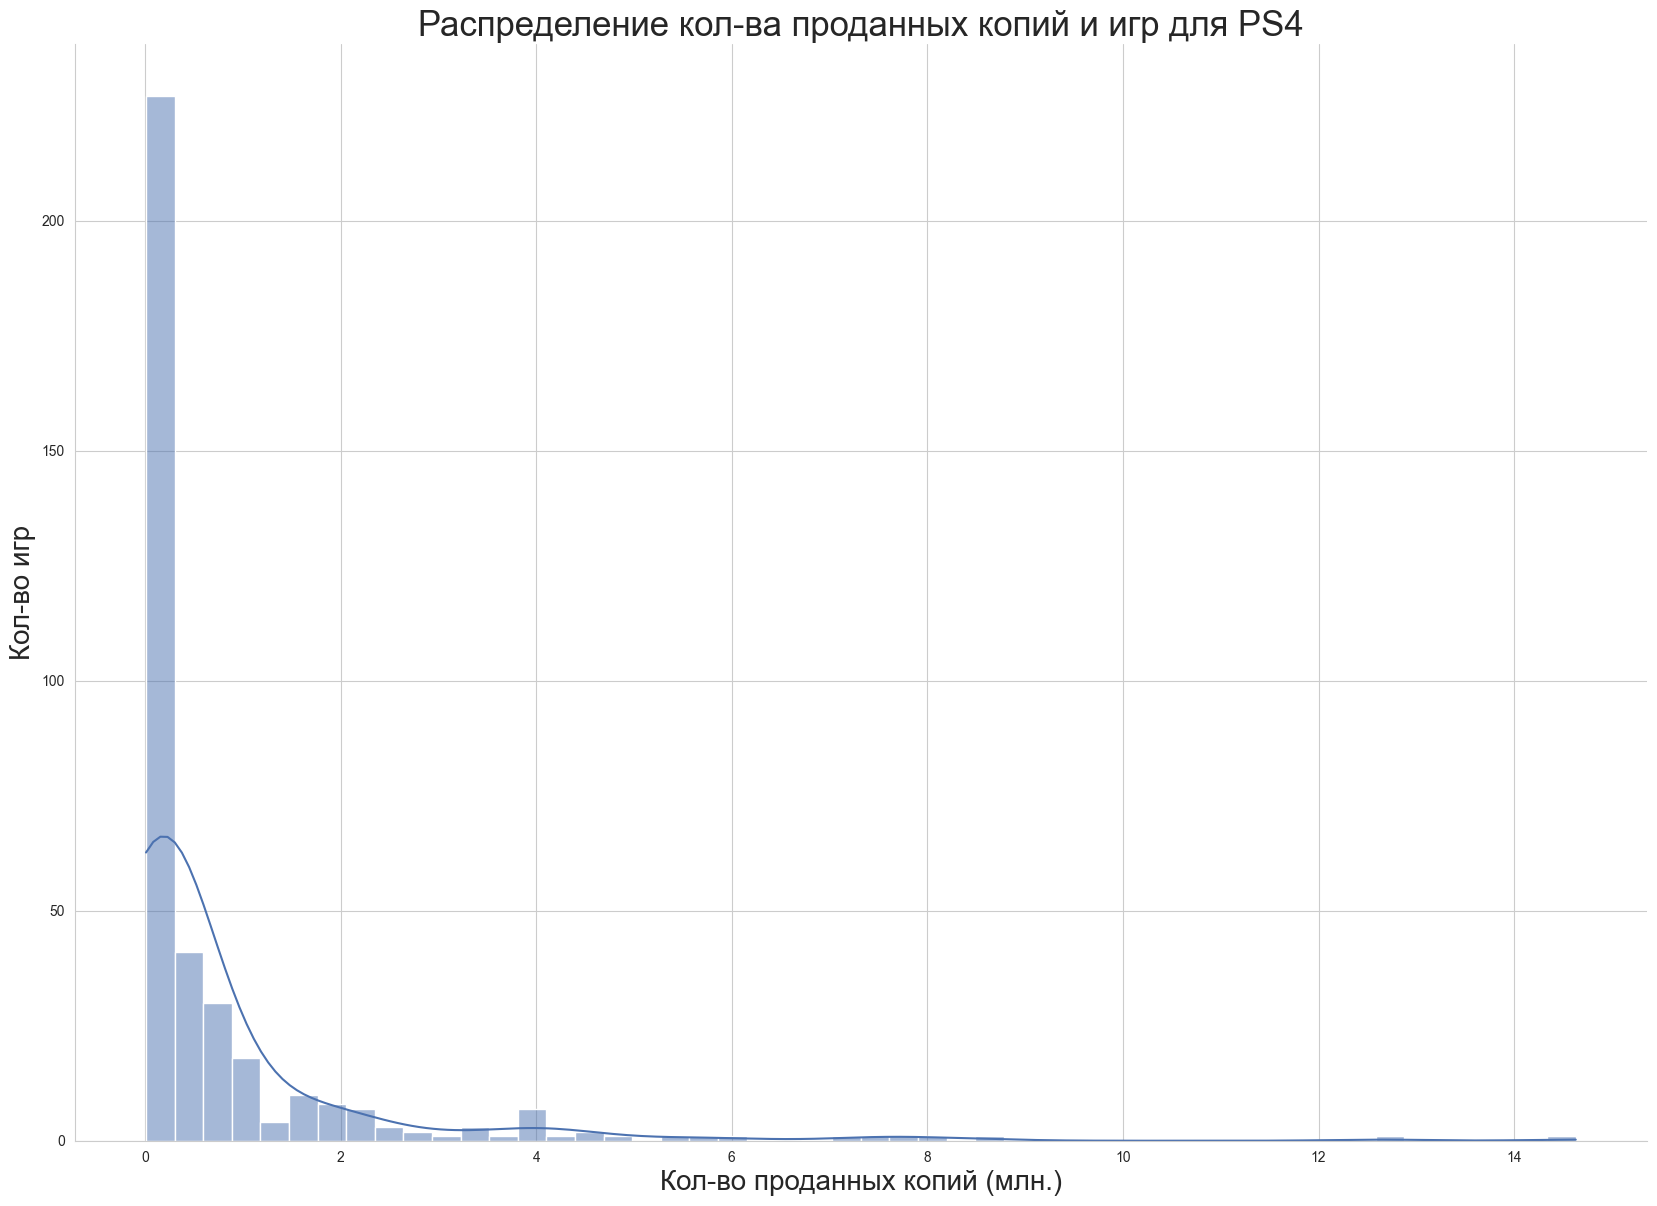

In [52]:
(
sns.displot(rel_data_ps4['sales_total'],
            bins=50,
            kde=True, 
            height=11.7, 
            aspect = 11.7/8.27)    
)
plt.xlabel('Кол-во проданных копий (млн.)', fontsize=20);
plt.ylabel('Кол-во игр', fontsize=20);
plt.title('Распределение кол-ва проданных копий и игр для PS4', fontsize=25);

In [53]:
rel_data_ps4.shape

(376, 12)

По гистограмме заметен скачок в количестве игр проданных примерно 4 млн. копий по всему миру. Ограничимся этим значением. Игр с большим значением единицы.

In [54]:
ps4_data = rel_data.query('platform == "PS4" & sales_total <= 4')
ps4_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
303,The Witcher 3: Wild Hunt,PS4,2015,Role-Playing,1.02,2.13,0.23,0.59,92.0,9.2,M,3.97
304,Assassin's Creed: Unity,PS4,2014,Action,1.19,2.07,0.08,0.62,70.0,4.9,M,3.96
305,Batman: Arkham Knight,PS4,2015,Action,1.53,1.69,0.10,0.64,87.0,7.6,M,3.96
314,NBA 2K16,PS4,2015,Sports,2.49,0.66,0.03,0.69,87.0,6.7,E10+,3.87
325,Tom Clancy's The Division,PS4,2016,Shooter,1.35,1.70,0.15,0.60,80.0,7.0,M,3.80


In [55]:
ps4_data.shape

(359, 12)

В итоге потеряли менее 1% актуальных данных.

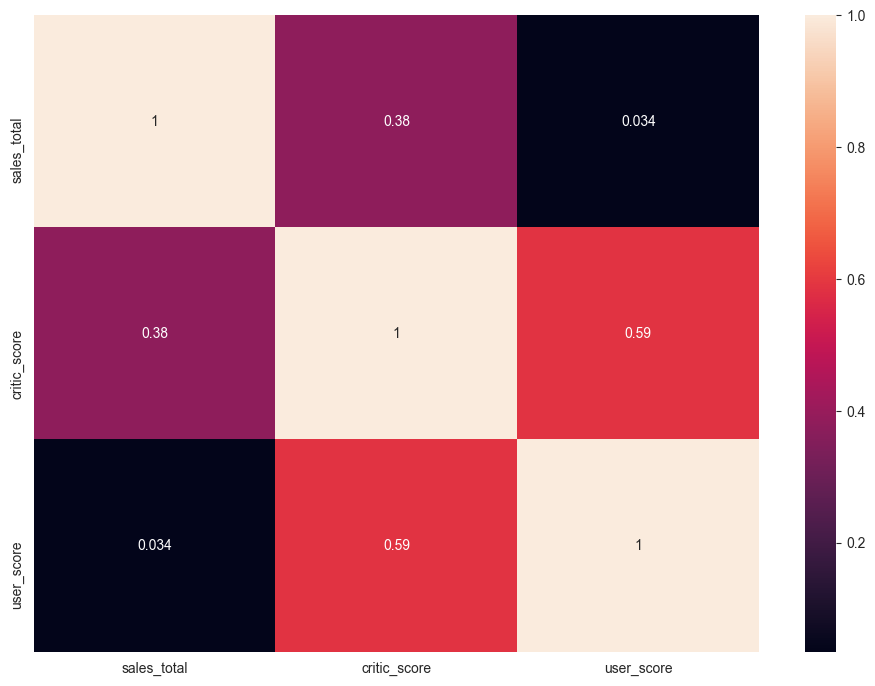

In [56]:
# создадим отдельный датафрейм с интересующими нас данными
data_corr = ps4_data[['sales_total', 'critic_score', 'user_score']]
# построим матрицу корреляций
corrmat = data_corr.corr()
f, ax = plt.subplots(figsize=(11.7, 8.27))
sns.heatmap(corrmat, vmax=1, annot=True);

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Тут всё верно, мы выбрали одну из платформ и проверили линейную зависимость между продажами и оценками пользователей и экспертов.

И вот здесь именно то место, которое упрощает жизнь за счет того, что мы не заполняли пропуски в 'critic_score' и 'user_score'. Если бы это было иначе - перед анализом корреляций надо было бы эти заполненные значения не учитывать (отфильтровывать).

Ввиду же того, что "пропуски" в столбцах с соответствующими оценками мы "заглушками" заполнять не стали (а NaN – значения метод .corr() не учитывает (ссылка на документацию: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html?highlight=corr#pandas.DataFrame.corr)), то и перед передачей данных в метод .corr() отфильтровывать нам их не пришлось.</div>

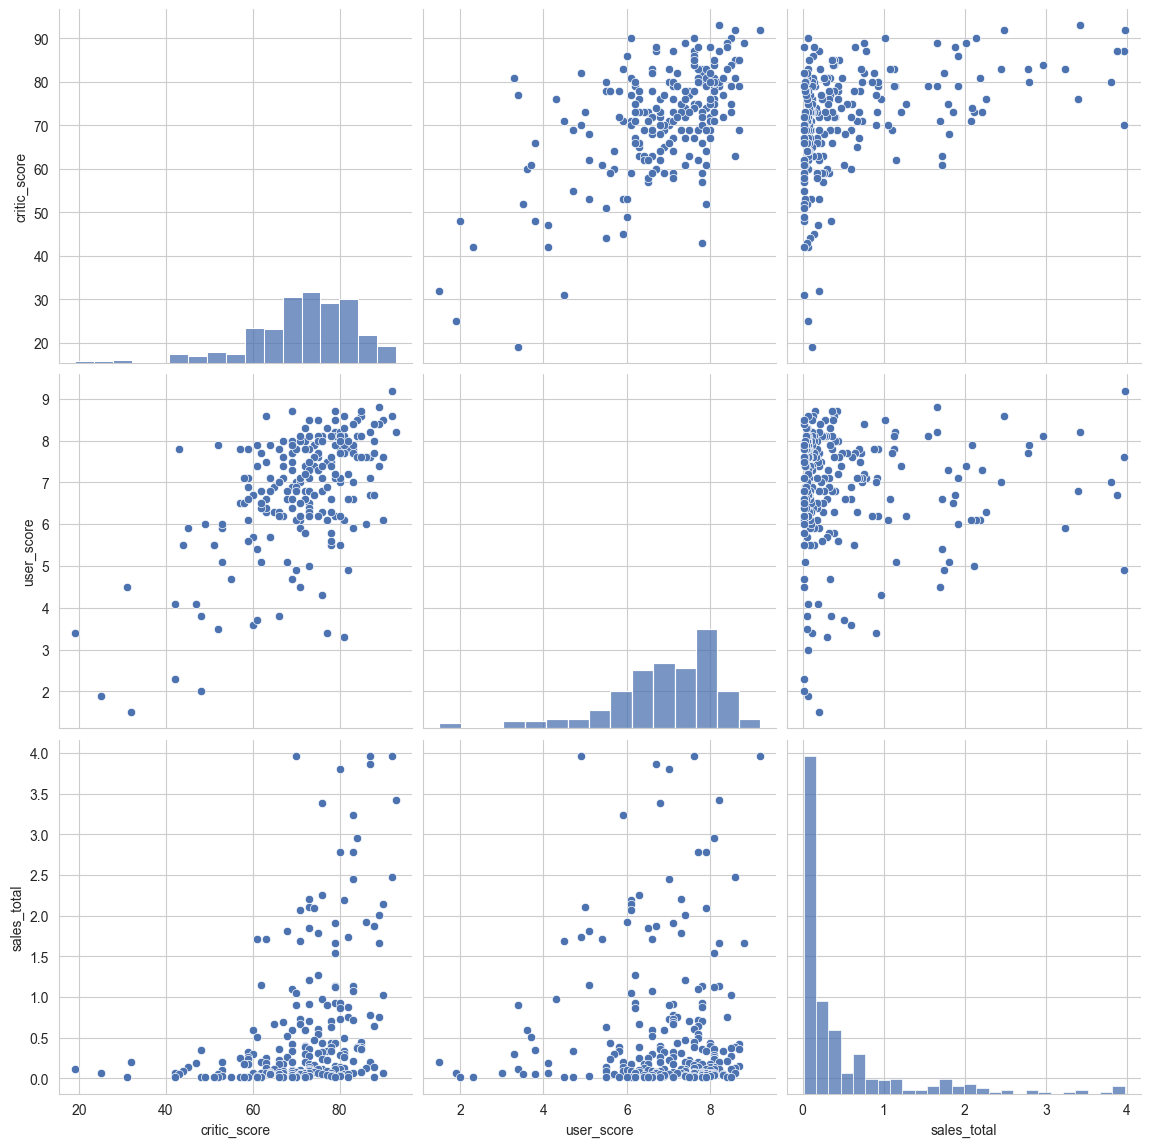

In [57]:
sns.pairplot(ps4_data[['critic_score', 'user_score', 'sales_total']])
plt.gcf().set_size_inches(12,12);

На основании полученных данных видно, что оценки критиков показывают слабую положительную корреляцию с числом продаж видеоигр (коэфф. Пирсона = 0.38). Интерпретировать результат можно следующим образом: некоторые люди ориентируются на оценки критиков, но это не точно, но лучше учитывать рейтинг от критиков в дальнейшем. Оценки пользователей не коррелируют с количеством продаж.

По диаграммам рассеяния видно, что оценка критиков не опускается ниже выше среднего для игр с большим количеством продаж, в то время как для пользователей число продаж не влияет на оценку.

##### XOne

Выполним те же действия для платформы XOne и сравним полученные данные с PS4. Так же ограничимся числом продаж в 4 млн. копий. По боксплоту заметно, что эту отметку пробивали лишь единицы.

In [58]:
xone_data = rel_data.query('platform == "XOne" & sales_total <= 4')
xone_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
342,Star Wars Battlefront (2015),XOne,2015,Shooter,2.04,1.28,0.02,0.32,NaN,NaN,NaN,3.66
373,Assassin's Creed: Unity,XOne,2014,Action,2.27,0.90,0.00,0.33,72.0,4.1,M,3.50
398,Destiny,XOne,2014,Shooter,2.14,0.92,0.00,0.31,75.0,5.5,T,3.37
413,Gears of War: Ultimate Edition,XOne,2015,Shooter,2.61,0.33,0.00,0.34,82.0,7.5,M,3.28
417,FIFA 16,XOne,2015,Sports,0.89,2.12,0.00,0.24,84.0,4.4,E,3.25


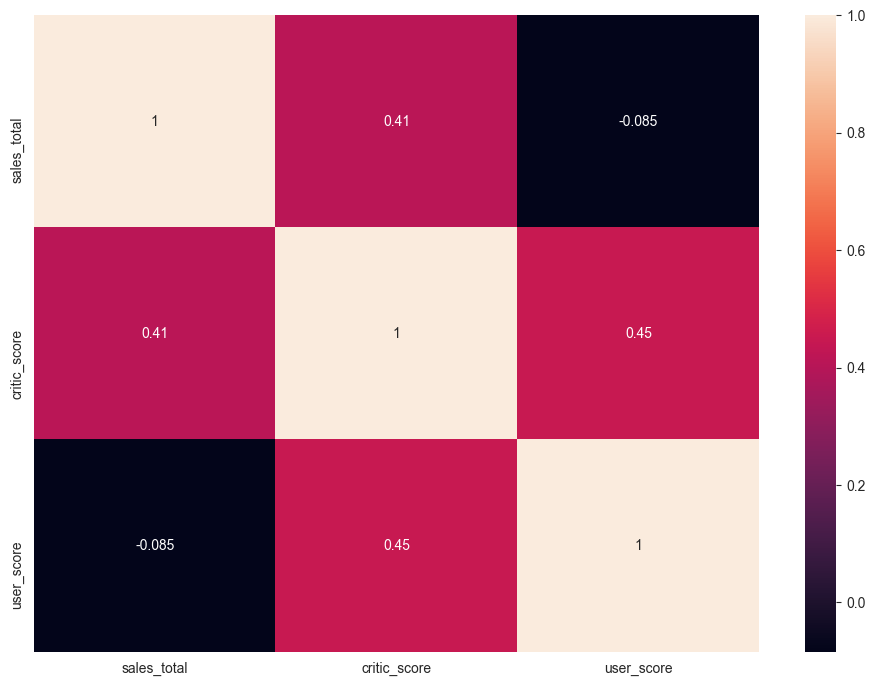

In [59]:
data_corr = xone_data[['sales_total', 'critic_score', 'user_score']]
corrmat = data_corr.corr()
f, ax = plt.subplots(figsize=(11.7, 8.27))
sns.heatmap(corrmat, vmax=1, annot=True);

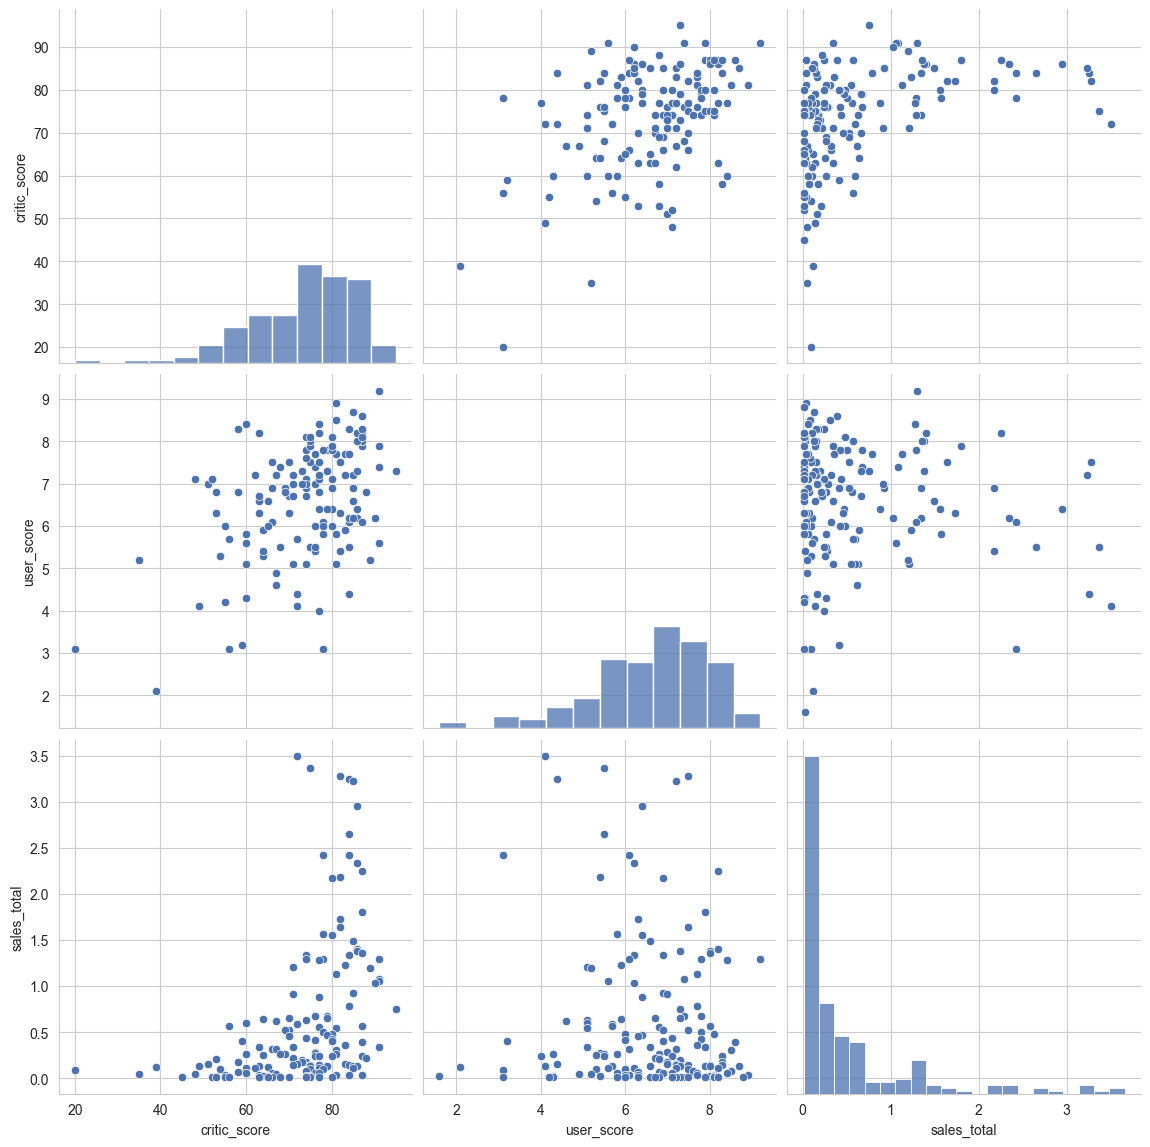

In [60]:
sns.pairplot(xone_data[['critic_score', 'user_score', 'sales_total']])
plt.gcf().set_size_inches(12,12);

Данные по корреляциям для приставки XOne ничем не отличаются от тех же данных для платформы PS4.

#### Анализ игр по жанрам

Посмотрим как распределены продажи игр по жанрам. Это поможет в дальнейшем определить возможную прибыль продукта. Для этого необходимо учитывать количество выпущенных игр в определенных жанрах и полагаться на значения медианных значений итоговых продаж.

In [61]:
(
rel_data
    .pivot_table(index='genre', 
                 values='sales_total', 
                 columns='year_of_release', 
                 aggfunc=['sum', 'count', 'mean', 'median'])
        .round(3)
)

sum               count               mean                \
year_of_release   2014   2015   2016  2014  2015  2016   2014   2015   2016   
genre                                                                         
Action           60.68  42.75  19.25  52.0  79.0  92.0  1.167  0.541  0.209   
Adventure         1.64   5.02   2.36   9.0  16.0  17.0  0.182  0.314  0.139   
Fighting          0.16   6.63   3.11   1.0  12.0   9.0  0.160  0.552  0.346   
Misc              9.94   3.89   0.68  13.0   9.0  14.0  0.765  0.432  0.049   
Platform          3.27   0.33   2.44   3.0   2.0   8.0  1.090  0.165  0.305   
Puzzle             NaN   0.02    NaN   NaN   1.0   NaN    NaN  0.020    NaN   
Racing            6.68   7.70   2.67   7.0  11.0  18.0  0.954  0.700  0.148   
Role-Playing      7.29  24.95   7.30  11.0  32.0  22.0  0.663  0.780  0.332   
Shooter          41.08  56.89  35.88  17.0  22.0  35.0  2.416  2.586  1.025   
Simulation         NaN   0.88   0.68   NaN   3.0   6.0    NaN  0.293  0.113   
Sports           23.23  29.69  20.77  21.0  28.0  27.0  1.106  1.060  0.769   
Strategy          0.10   0.29   0.26   2.0   2.0   3.0  0.050  0.145  0.087   

                median                
year_of_release   2014   2015   2016  
genre                                 
Action            0.44  0.160  0.050  
Adventure         0.15  0.065  0.030  
Fighting          0.16  0.220  0.150  
Misc              0.19  0.380  0.025  
Platform          1.02  0.165  0.120  
Puzzle             NaN  0.020    NaN  
Racing            0.64  0.260  0.060  
Role-Playing      0.52  0.120  0.200  
Shooter           1.54  1.275  0.350  
Simulation         NaN  0.320  0.060  
Sports            0.60  0.145  0.260  
Strategy          0.05  0.145  0.080

В некоторых жанрах сильно отличаются медианные и средние значения. Скорее всего на такие результаты влияет появление сильно успешных или провальных игр. Поэтому лучше ориентироваться на медиану. 

In [62]:
# создадим сводную таблицу только со значениями медиан
median_data = (rel_data
    .pivot_table(index='genre', 
                 values='sales_total', 
                 columns='year_of_release', 
                 aggfunc='median',
                 margins=True,
                 margins_name='median_total')
                .iloc[:-1]
                .sort_values(by='median_total', ascending=False)
)

In [63]:
median_data

year_of_release,2014,2015,2016,median_total
genre,,,,
Shooter,1.54,1.275,0.350,0.820
Sports,0.60,0.145,0.260,0.345
Role-Playing,0.52,0.120,0.200,0.200
Racing,0.64,0.260,0.060,0.175
Fighting,0.16,0.220,0.150,0.170
Misc,0.19,0.380,0.025,0.165
Platform,1.02,0.165,0.120,0.160
Action,0.44,0.160,0.050,0.140
Simulation,NaN,0.320,0.060,0.120


In [64]:
median_data_total = median_data.iloc[:,-1]

In [65]:
median_data_total

genre
Shooter         0.820
Sports          0.345
Role-Playing    0.200
Racing          0.175
Fighting        0.170
Misc            0.165
Platform        0.160
Action          0.140
Simulation      0.120
Strategy        0.080
Adventure       0.070
Puzzle          0.020
Name: median_total, dtype: float64

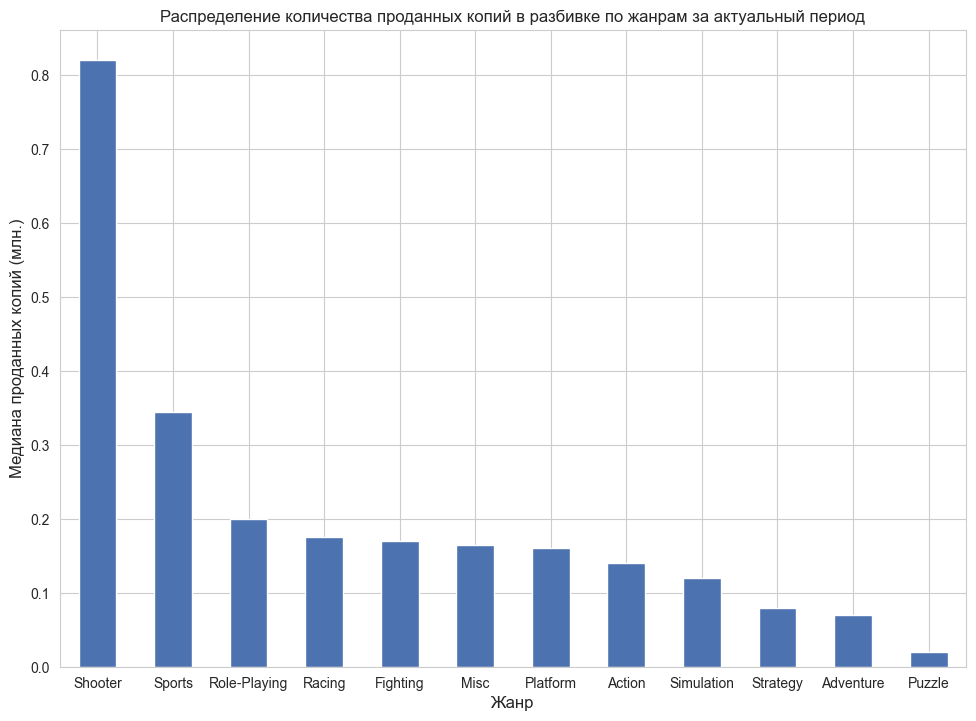

In [66]:
median_data_total.plot(x="genre", kind='bar', figsize=(11.7, 8.27), grid=True, legend=False, rot=0);
plt.title('Распределение количества проданных копий в разбивке по жанрам за актуальный период', fontsize=12)
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Медиана проданных копий (млн.)', fontsize=12);

Общее распределение продаж по жанрам сильно отличается. Можно выделить 1 основной жанр с наибольшей медианой продаж - это `Shooter`. Этот жанр является самым успешным и прибыльным. Далее следует `Sports`. Он сильно уступает жанру "Экшн", но выделяется среди оставшихся. Жанр `Puzzle` продается в очень маленьких количествах.

**Вывод**

Игровая индустрия с 1993 года начала стремительно развиваться вплоть до 2008-2009 года. Мировой экономический кризис, который начался в 2008 году и в некоторых сохранялся вплоть до 2013 года, повлиял на уменьшения спроса на видеоигры. В таких условиях населению было не до развлечений и игр, поэтому начался резкий спад.

Впервые после этих событий в 2015 году начался рост продаж. Динамика роста не такая быстрая, какой была в прошлом. Это объяcняется появление новых технологий, мобильных телефонов с сенсорным экраном. Большая доля рынка перешла в мобильные игры.
Так же повысились требования для разработки видеоигры. Пользователи стали более избирательными, поэтому известные разработчики стали выпускать игры реже, но делая их более качественными.

За 20 лет было выпущено огромное количество платформ. Некоторые разработчики приставок полностью уходили из рынка. Некоторые продолжали выпуск усовершенствованных приставок. Было замечено, что продолжительность жизни приставки составляет 8-12 лет. При этом пик продаж игр для этой приставки приходится на 4-5 лет спустя ее релиза.

Основная доля рынка сконцентрирована в Европе и  Северной Америке. В этих регионах доминируют всего лишь две приставки PS4 и XOne. Учитывая, что эти приставки вышли в конце 2013 года, то по выявленной закономерности в 2017-2018 придет пик продаж видеоигр для этих платформ.

### Портрет пользователя по региону

Портрет пользователя будем составлять по трем регионам - Северная Америка, Европа и Япония. В данных так же присутствует колонка с продажами по другим регионам, но их учитывать не будем, так как не указан конкретный регион. Важно понять как образ мышления и культура влияет на спрос видеоигр по жанрам. Если выявить такие закономерности, то в будущем можно будет предугывать какая игра окажется популярной в конкретном регионе и стать одним из первых ее дистрибьюторов.

Ранее выделили только две игровые приставки и заметили, что большая часть пользователей этих приставок находятся в Европе и Северной Америке. Менее популярные приставки занимают свою долю рынка в Японии. Поэтому учтем их для полноты данных.

В данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков». С одной стороны, присваивая игре низкую возрастную категорию, игра становится доступной для большей аудитории, но такие игры не интересы людям старшего возраста.

Резюмируя вышесказанное, определим следующие показатели для каждого пользователя из трех регионов и опишем различия и сходства.
1. Топ-5 популярных платформ
2. Топ-5 популярных жанров
3. Влияние рейтинга ESRB

#### Топ-5 платформ

Ограничимся данными за 2014-2016 год как и прежде, но учтем другие платформы тоже. Не будем учитывать другие регионы.

In [67]:
typ_user_data = data.query('year_of_release > 2013')
typ_user_data = typ_user_data.drop('other_sales', axis=1)

Для каждого региона построим диаграмму распределения продаж видеоигр.

##### Для европы

In [68]:
#чтобы не повторять один и тот же код построения диаграмм - напишем функцию
# аргументами функции будут регион продаж и их наименование
def top_pie_chart(index, country_sales, name):
    # в начале сгруппируем данные по платформам и сумме продаж каждой платформы
    (
    typ_user_data
        .groupby(index)[country_sales]
        .sum()
        .sort_values(ascending=False) #отсортируем показатели по убыванию
        .head() # чтобы оставить топ-5 платформ достаточно воспользоваться методом .head()
        .plot(kind='pie', 
                    y=country_sales, 
                    autopct='%1.1f%%', 
                    startangle=90, 
                    legend=False, 
                    figsize=(11.7,8.27))
    )
    #далее круговую диаграмму и форматируем ее вид
    plt.title(name);
    plt.ylabel('');

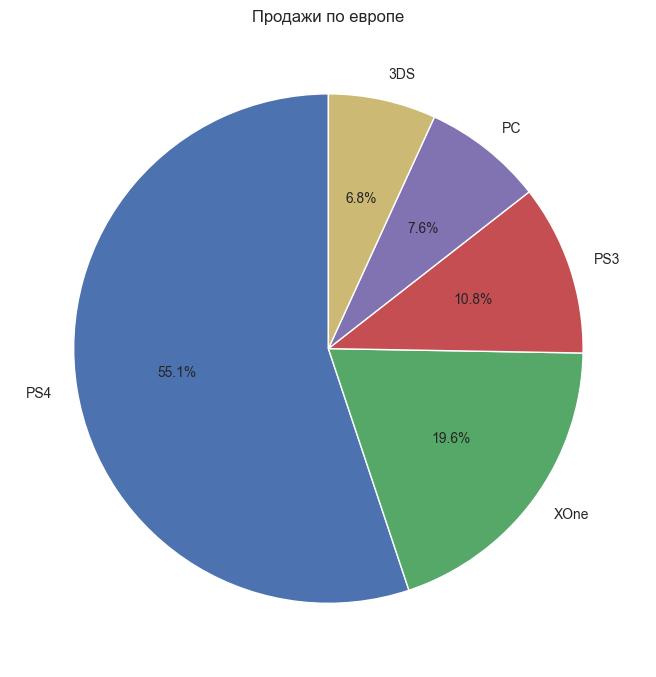

In [69]:
top_pie_chart('platform', 'eu_sales', 'Продажи по европе')

Однозначная популярность у приставки PS4. На нее приходится больше половины продаж видеоигр в Европе. Чуть меньше 20% процентов продаж у XOne. В случае с PS3 продажи будут сокращаться в дальнейшем, так как в октябре 2016 года будет приостановлена поддержка платформы. Игр для персональных компьютеров и нинтендо 3DS имеют менее 10% от всех продаж по европе.

##### Для Северной Америки

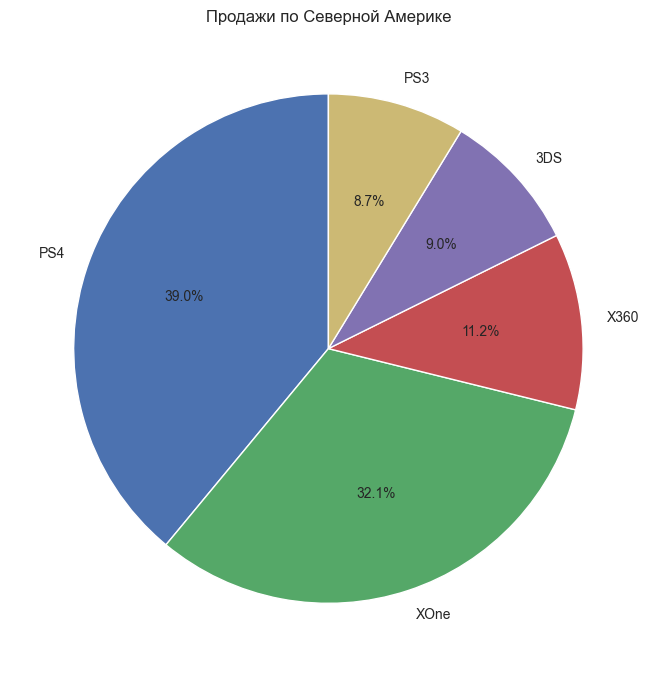

In [70]:
top_pie_chart('platform', 'na_sales', 'Продажи по Северной Америке')

* в Северной Америке видеоигры для персонального компьютеар не входят в топ-5 продаж;
* XOne занимает почти одинаковую долю регионального рынка, что и PS4;
* далее идут те же приставки, но прошлого поколения PS3 и X360;
* чуть менее 10% у 3DS

##### Для Японии

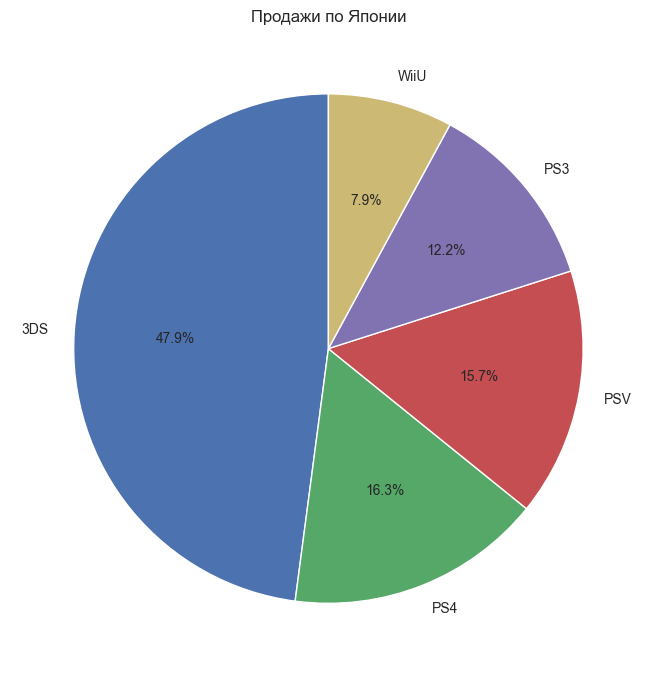

In [71]:
top_pie_chart('platform', 'jp_sales', 'Продажи по Японии')

* почти половина рынка - это продажи видеоигр для 3DS
* оставшиеся доли - это приставки и портативные приставки японского производства.

##### Вывод



В целом можно сказать, что рынок видеоигр по 5 самым популярным платформам Европы и Северной Америке примерно одинаков. В этих регионах преобладают продажи игр для игровых приставок. Есть несколько заметных различий:

1. В Европе PS4 занимает 55% рынка, а в Северной Америке 39%
2. В Европе XOne занимает 20% рынка, а в Северной Америке 31%
3. В Северной Америке почти 12% продаж приходится на X360, а в Европе эта приставка не входит в топ-5.
4. Персональные компьютеры занимают малую долю рынка в Европе, но все же входят в топ-5, а в Америке они непопулярны.

В случае с рынком в Японии дела обстоят совершенно иначе. Топ-5 популярных платформ - это платформы японского производства. Причем почти 50% рынка занимает nintendo 3DS. Это портативная консоль 2011 года выпуска. Портативные приставки в Северной Америке и Европе - это вымирающий вид, а в Японии это самая популярная платформа. Еще почти 16% занимает другая портативная приставка PSV. Остальное делится между PS4, PS3 и WiiU. Последняя платформа была выпущена в 2012 году, но имеет только 8% продаж. Провальная рекламная кампания и огромное количество негативных отзывов почти привели к краху некогда известной серии приставок.

В итоге рынок видеоигр Японии очень сильно отличается от рынка Европы и Северной Америки.

#### Топ-5 жанров

##### Для Европы

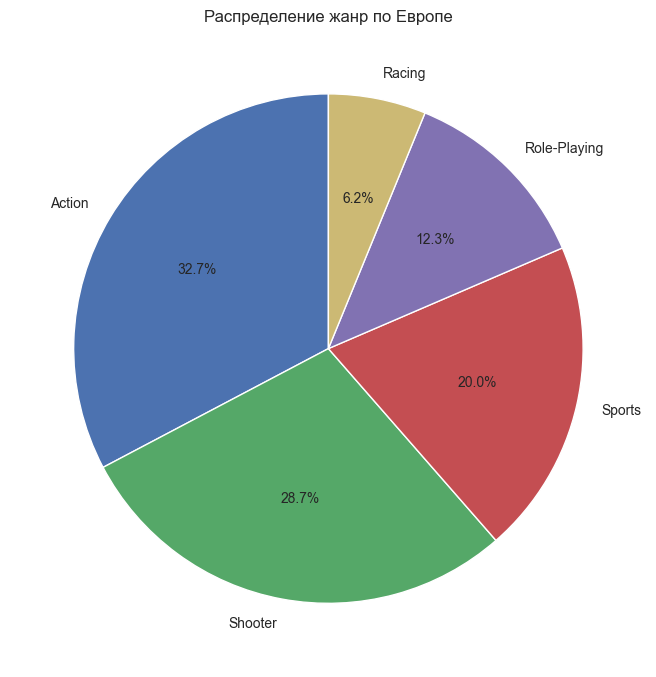

In [72]:
top_pie_chart ('genre', 'eu_sales', 'Распределение жанр по Европе')

* `Action` и `Shooter` почти одинаково популярны - примерно 30%;
* `Sports` чуть меньше - 20%;
* `RPG` игры занимают 12%, ранее заметили, что этот жанр растет в популярности;
* `Racing` наименее популярный из 5 самых популярных жанров в Европе.

##### Для Северной Америки

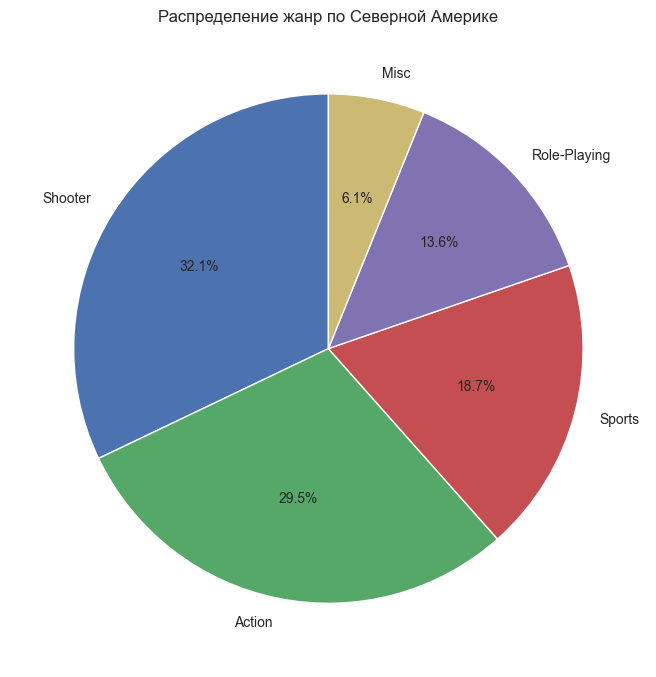

In [73]:
top_pie_chart ('genre', 'na_sales', 'Распределение жанр по Северной Америке')

* примерно такое же распределение, что и у рынка в Европе.

##### Для Японии

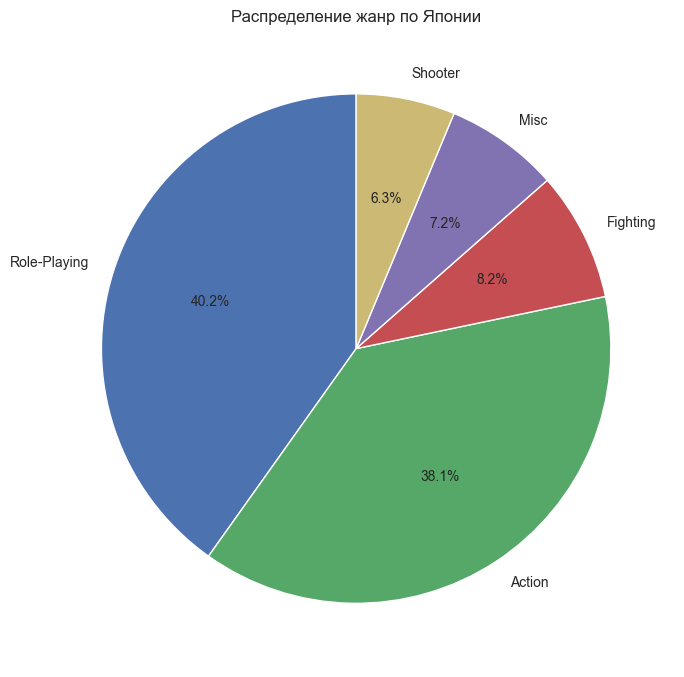

In [74]:
top_pie_chart ('genre', 'jp_sales', 'Распределение жанр по Японии')

* в Японии очень популярный жанр `RPG` -  40% продаж;
* `Action` так же имеет почти 40% продаж и популярен по всем трем регионам;

##### Вывод

Так же как и на распределение продаж по платформам, жанры в Европе и Северной Америки почти не отличаются. Примерно одинаковые доли одних и тех же жанров. Только в Америке последнюю строчку занимает `Misc` (игры со смешанным жанром), а Европе - `Racing`. Так же ранее заметили, что `RPG` игры растут в популярности и в будущем могут обогнать категорию `Sports`. 

Снова выделяется Япония. Почти 80% рынка популярных жанров занимают две категории - `RPG`и `Action`. Скорее всего так сложилось исторически. Ведь самые первые популярные игры в жанре rpg появились именно в Японии. Так же стоит заметить, что японские rpg игры и западные довольно сильно различаются. Для западных характерно боевая система в режиме реального времени и нелинейный сюжет, игра больше напоминает "песочницу". А японские rpg игры кардинально отличаются. Для них свойствен линейный сюжет и пошаговая боевая система. Именно такие rpg популярны в Японии.

#### Влияние рейтинга ESRB на продажи в регионе

Entertainment Software Rating Board (ESRB) - негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде. 

* E - означает, что игра подходит для всех;
* E+10 - означает, что игра подходит для всех от 10 лет и старже;
* T - означает, что игра подходит для лиц от 13 лет;
* M - для взрослых 17+


Ранее мы заметили пропуски в столбце с рейтингом, но никак не заполнили. Посмотрим на количество пропусков.

In [75]:
typ_user_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   float64
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   critic_score     718 non-null    float64
 8   user_score       888 non-null    float64
 9   rating           940 non-null    object 
 10  sales_total      1689 non-null   float64
dtypes: float64(7), object(4)
memory usage: 158.3+ KB


Если анализировать по таким данным, то больше половины актуальной информации будет потеряно. Поэтому необходимо учесть пропущенные значения. Так как достоверно восстановить по имеющимся данным пропуски нельзя, заменим их на заглушку 'unknown'.

In [76]:
typ_user_data['rating'] = typ_user_data['rating'].fillna(value='unknown')

##### Для Европы

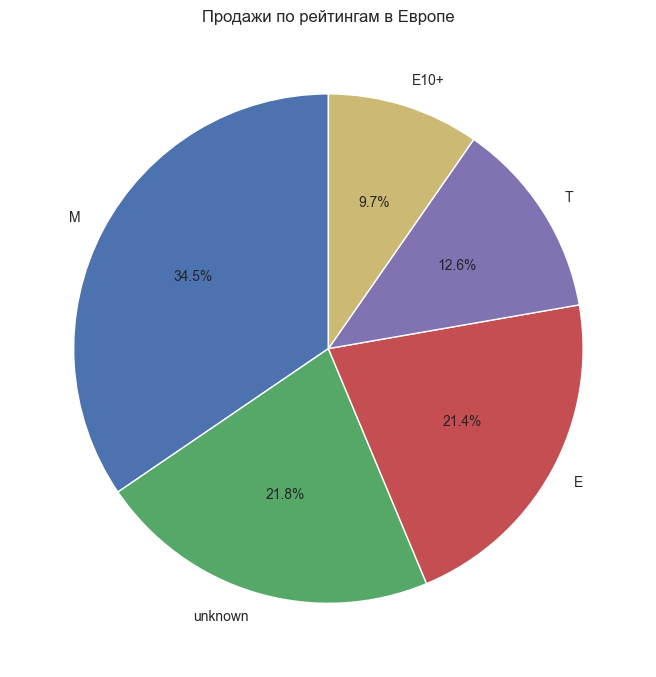

In [77]:
top_pie_chart ('rating', 'eu_sales', 'Продажи по рейтингам в Европе')

* треть рынка - это видеоигры с рейтингом "M";
* пятую долю рынка занимают игры с неизвестным рейтингом.

##### Для Северной Америки

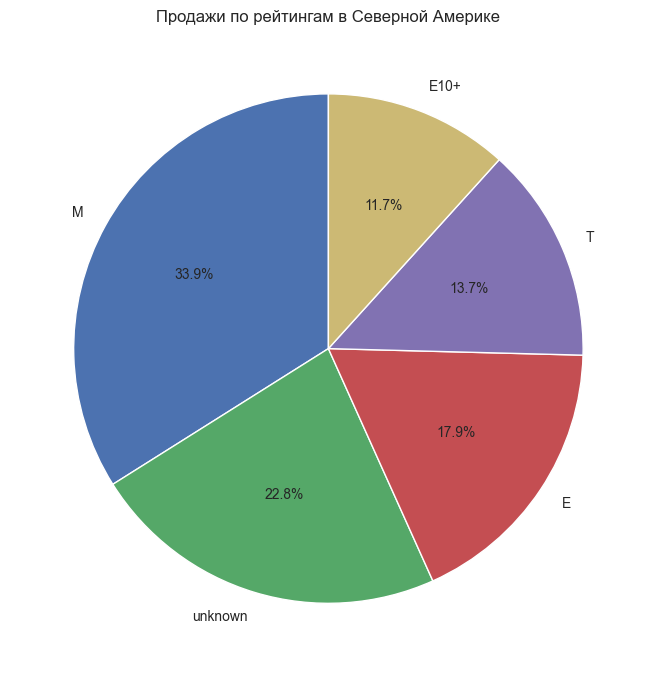

In [78]:
top_pie_chart ('rating', 'na_sales', 'Продажи по рейтингам в Северной Америке')

* ничем не отличается от Европы;

##### Для Японии

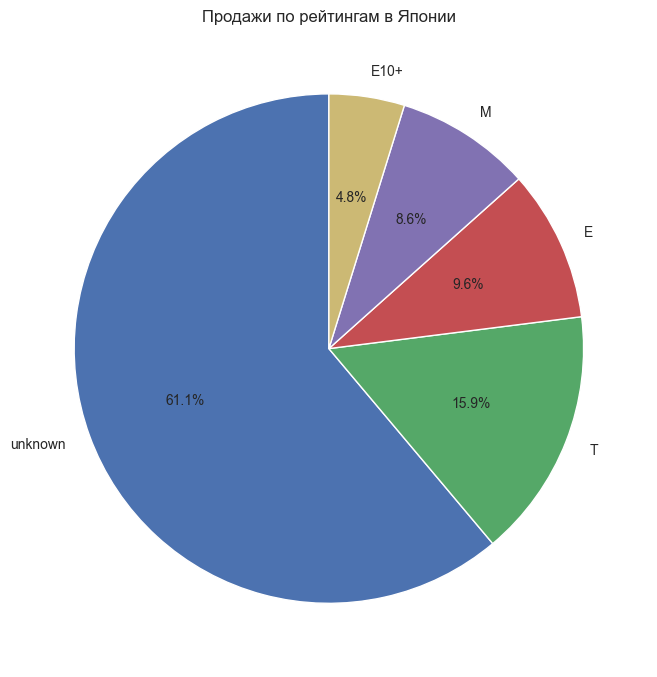

In [79]:
top_pie_chart ('rating', 'jp_sales', 'Продажи по рейтингам в Японии')

* более 60% продаж - это видеоигры с неизвестным рейтингом.

##### Вывод

Пользователи европейского и американского рынков видеогр предпочитают один и тот же жанр. Их распределение по регионам не сильно отличается. 

Делать выводы по распределению рейтинга на японском рынке видеоигры нельзя. Больше половины игр без указания рейтинга, слишком много пропущенных значений.

#### Общий вывод пункта по портрету

Для каждого региона было обработано достаточно данных, чтобы определить типичный портрет пользователя продукции игровой индустрии.

1. Для Европы - это взрослый человек старше 17 лет, который предпочитает игровкую приставку PS4 и игры в жанре `Action`, `Shooter`, `Sports`.

2. Для Северной Америки - это взрослый человек старше 17 лет, который препочитает игровую приставку PS4 или XOne и игры в жанре `Action`, `Shooter`, `Sports`. 

3. Для Японии - это пользователь неизвестного возраста, который препочитает игровую портативную приставку 3DS и игры в жанре `Action` или `Role-Playing`. 

Пропуски в данных многовероятно связаны с тем, что организация ESRB действует на территории Северной Америке. В Япония существует своя органзинация, у которой могут быть разделения по другим категориям.

### Составление и проверка гипотез

По техническому заданию необходимо проверить две гипотезы, связанные с пользовательским рейтингом. Проверим среднее значение оценок пользователей для платформ PC и XOne. Посмотрим на различие между средними оценками пользователей игр в жанре `Sports` и `Action`.

В итоге имее две гипотезы:

1. Средние значения оценок пользователей платформ PC и XOne не отличаются.
2. Средние оценки пользователей игр в жанре `Sports` и `Action` разные.

Статистическую проверку будет проводить по актуальному периоду 2014-2016гг.

#### Первая гипотеза

```
H_0: Оценка (user_score) видеоигр XOne = оценка (user_score) видеоигр PC
H_a: Оценка (user_score) видеоигр XOne ≠  оценка (user_score) видеоигр PC
alpha = 0.05
```


In [80]:
hyp_data = data.query('year_of_release > 2013 & (platform == "PC" | platform == "XOne")')

In [81]:
hyp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 379 entries, 99 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             379 non-null    object 
 1   platform         379 non-null    object 
 2   year_of_release  379 non-null    float64
 3   genre            379 non-null    object 
 4   na_sales         379 non-null    float64
 5   eu_sales         379 non-null    float64
 6   jp_sales         379 non-null    float64
 7   other_sales      379 non-null    float64
 8   critic_score     271 non-null    float64
 9   user_score       287 non-null    float64
 10  rating           279 non-null    object 
 11  sales_total      379 non-null    float64
dtypes: float64(8), object(4)
memory usage: 38.5+ KB


Есть пропущенные значения, но имеющихся данных более чем достаточно для проверки гипотез.

In [82]:
hyp_data.describe().T

,count,mean,std,min,25%,50%,75%,max
year_of_release,379.0,2015.087071,0.806925,2014.00,2014.00,2015.00,2016.000,2016.00
na_sales,379.0,0.233509,0.519427,0.00,0.00,0.05,0.210,4.59
eu_sales,379.0,0.169446,0.318606,0.00,0.02,0.06,0.155,2.19
jp_sales,379.0,0.000844,0.004156,0.00,0.00,0.00,0.000,0.04
other_sales,379.0,0.037916,0.078188,0.00,0.00,0.01,0.040,0.68
critic_score,271.0,74.830258,11.301293,20.00,69.00,76.00,83.000,97.00
user_score,287.0,6.468641,1.527507,1.40,5.70,6.80,7.600,9.30
sales_total,379.0,0.441715,0.864015,0.01,0.03,0.13,0.440,7.39


Медиана и среднее значение мало отличаются, большая часть оценок до 7.6 баллов по 10-ой шкале.

Построим графики распределения оценок пользователей для каждой платформы.

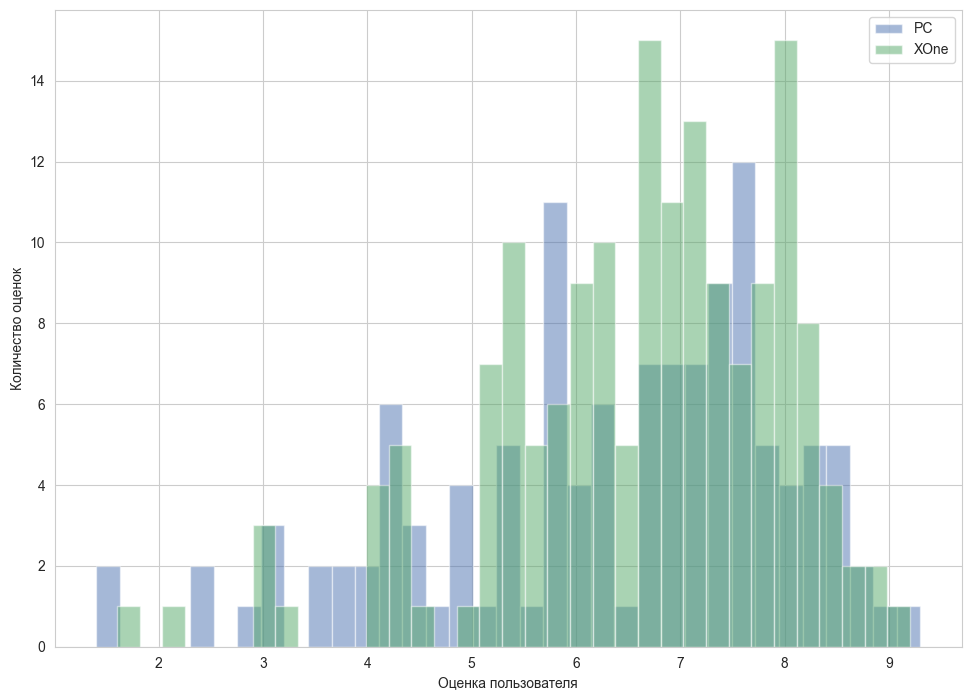

In [83]:
fig = plt.subplots(figsize=(11.7, 8.27))
hyp_data.groupby('platform')['user_score'].plot(kind='hist', bins=35, alpha=0.5)
plt.legend()
plt.xlabel('Оценка пользователя')
plt.ylabel('Количество оценок')
plt.show()

Средняя оценка пользователей видеоигр для XOne больше, чем у видеоигр для PC. Высокие оценки встречаются чаще у XOne. Самая низкая оценка у PC. Сравним количество оценок.

In [84]:
stat_data = hyp_data.dropna(subset=['user_score'])

In [85]:
stat_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287 entries, 165 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             287 non-null    object 
 1   platform         287 non-null    object 
 2   year_of_release  287 non-null    float64
 3   genre            287 non-null    object 
 4   na_sales         287 non-null    float64
 5   eu_sales         287 non-null    float64
 6   jp_sales         287 non-null    float64
 7   other_sales      287 non-null    float64
 8   critic_score     266 non-null    float64
 9   user_score       287 non-null    float64
 10  rating           268 non-null    object 
 11  sales_total      287 non-null    float64
dtypes: float64(8), object(4)
memory usage: 29.1+ KB


In [86]:
stat_data.groupby('platform')['critic_score'].count()

platform
PC      115
XOne    151
Name: critic_score, dtype: int64

В итоге у нас есть две независимые выборки с разным количеством данных. Дисперсии этих выборок необязательно равны, поэтому применяем статистический тест с t-критерием Уэлча. Уровень статистической значимости примем равным 5%. То есть, вероятность случайного получения статистически значимого результата составляет менее 5%. Чем точнее необходимо получить результат, тем меньше альфа-уровень. Для данного исследования достаточно 5%.

In [87]:
pc = stat_data[stat_data['platform'] =='PC']
xone = stat_data[stat_data['platform'] =='XOne']

pc = pc['user_score']
xone = xone['user_score']

# results = вызов метода для проверки гипотезы
results = st.ttest_ind(pc, xone, equal_var=False)

# alpha - уровень стат.значимости
alpha = 0.05

# вывод значения p-value на экран
print('p-значение:', results.pvalue)

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

p-значение: 0.11601398086668835
Не получилось отвергнуть нулевую гипотезу.


В нашем случае у нас недостаточно оснований, чтобы отклонить нулевую гипотезу. То есть это означает, что наши данные неплохо согласуются с нулевой гипотезой.

#### Вторая гипотеза

```

H_0: Оценка (user_score) видеоигр в жанре Action ≠ оценка (user_score) видеоигр в жанре Sports
H_a: Оценка (user_score) видеоигр в жанре Action = оценка (user_score) видеоигр в жанре Sports
alpha = 0.05

```


In [88]:
hyp2_data = rel_data.query('genre == "Action" | genre == "Sports"')

In [89]:
# проверим количество пропущенныз значений в пользовательских оценках
hyp2_data['user_score'].isna().sum()

90

In [90]:
# уберем данные с пропущенным значением оценки, они нам не понадобятся
hyp2_data = hyp2_data.dropna(subset=['user_score'])

In [91]:
# check
hyp2_data['user_score'].isna().sum()

0

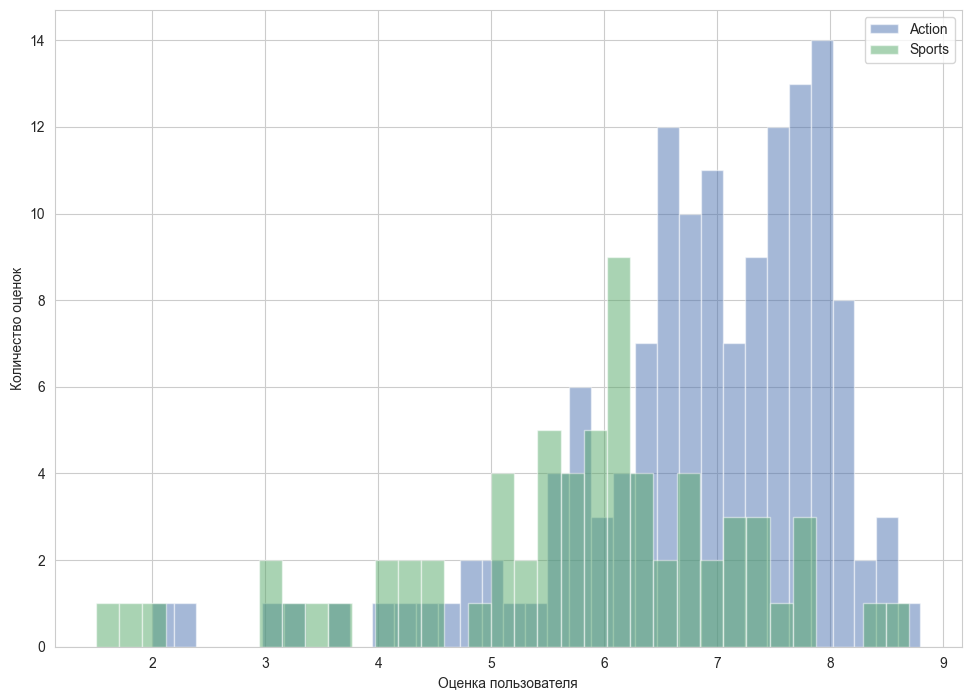

In [92]:
fig = plt.subplots(figsize=(11.7, 8.27))
hyp2_data.groupby('genre')['user_score'].plot(kind='hist', bins=35, alpha=0.5)
plt.legend()
plt.xlabel('Оценка пользователя')
plt.ylabel('Количество оценок')
plt.show()

In [93]:
hyp2_data.groupby('genre')['user_score'].count()

genre
Action    141
Sports     68
Name: user_score, dtype: int64

Аналогичная ситуация. Оценок по жанрам Action почти в 2.5 раз больше. Выполним статистический тест и проверим гипотезу.

In [94]:
action_data = hyp2_data[hyp2_data['genre'] =='Action']
sports_data = hyp2_data[hyp2_data['genre'] =='Sports']

action_data = action_data['user_score']
sports_data = sports_data['user_score']

# results = вызов метода для проверки гипотезы
results = st.ttest_ind(action_data, sports_data, equal_var=False)

# alpha - уровень стат.значимости
alpha = 0.05

# вывод значения p-value на экран
print('p-значение:', results.pvalue)

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

p-значение: 6.901043774734014e-07
Отвергаем нулевую гипотезу.


Статистический уровень значимости получился меньше 0.05. У нас достаточно оснований отклонить нулевую гипотезу.

То есть для имеющихся данных средняя оценка пользователей игр в жанре `Action` в большинстве случаев равна средней оценкой пользователей игр в жанре `Sports`.

### Общий вывод

**Перед началом исследования критериев успешности видеоигр по имеющимся данным было выполнено следующее для оптимизации данных:**
1. Изменены названия колонок.
2. Изменены типы данных в определенных столбцах.
3. Пропущенные значения было решено оставить.
4. Был добавлен новый столбец с суммарными продажами по регионам.

**Далее был проведен исследовательский анализ данных. На основе этого анализа было выявлено, что:**

1. Продажи игр начали увеличиваться после резкого спада на фоне мирового кризиса 2008-2013.
2. На рынке доминирует всего лишь две платформы PS4 и Xone (оба 2013 года выпуска).
3. Выяснили, что пик продаж приходится на срок 4-5 лет с момента релиза приставки.

**На основе этих данных был принят актуальный период данных 2014 - 2016 гг. Несмотря на неполноту данных за 2016 год было решено оставить из-за ценности этих данных.**

**Попытались обнаружить корреляцию между количество продаж и оценками критиков и пользователей. Было выяснено, что:**

1. Оценки пользователей никак не коррелируются с продажами.
2. Оценки критиков демонстрируют слабую, положительную корреляцию с продажами.

**Проведя анализ по жанрам, выяснили, что:**

1. Рынок видеоигр Европы и Северной Америки очень похож по предпочтениям в жанре (доминируют Action и Shooter).
2. Рынок Японии отличается от западного рынка достаточно сильно (доминирует RPG).

**На основе результатов 4 пункта исследования был составлен типичный портрет игрока для каждого из регионов.**

1. Для Европы и Америки такой портрет отличается лишь тем, что XOne популярна в Северной Америке, а в Европе доминирует PS4. Жанровые предпочтения и возраст ничем не отличаются(`Action`, `Shooter`, `Sports` и 17 лет соответственно)

2. Для Японии же - это пользователь, который препочитает игровую портативную приставку 3DS и игры в жанре `Action` или `Role-Playing`. Более точно установить портрет пользователя в Японии не удалось из-за искаженных данных.

**Составлены и проверены гипотезы средних оценок пользователей.**

1. Не удалось отвергнуть нулевую гипотезу.
2. Достаточно оснований для отклонения нулевой гипотезы.

Цель исследования заключалась в выявлении закономерностей успешности видеоигры для прогноза будущих продаж. Можно с уверенностью сказать, что необходимо ориентироваться на рынки Северной Америки и Европы. Для Европы большую часть прибыли принесут игры на платформе PS4 в жанре `Shooting` и `Sports`. Для Северной Америки некоторую долю займет игры на приставке XOne тех же жанров. По поводу жанра `Action` требуются дополнительные данные, так как видеоигры в жанре `Action` сильно различаются в качестве. Возможно удастся предугадать хорошую прибыльность игры в этом жанре. На рынок Японии ориентироваться не стоит из малого товарооборота.

В целом данные вызывают сомнения в корректности. Непонятно откуда брались рейтинги пользователей и критиков. Скорее всего это один известный сайт и опираться на данные одного сайта некорректно. Поэтому утверждать, что количество продаж не коррелируется с оценками пользователей или слабо коррелирует с оценками критиков нельзя. Данные так же могут быть искажены, потому что в них присутствует только оценка рейтинга возраста от ESRB. Но в Европе и Японии действуют совсем другие организации и оцениваются по-другому. Для уточнения зависимостей и ситуации на рынках необходимо более свежие и независимые данные. Имеющиеся данные подойдут, если только ориентироваться на западный рынок.

